# Prediction of Data Scientist Job Salary from Glassdoor

###  *Retrieve the Raw Data*

In [1]:
import pandas as pd
import numpy as np
import re

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud 
import plotly.express as px

In [2]:
df_start = pd.read_csv('eda_data.csv')
df_start

Unnamed: 0                                          Job Title   
0             0                                     Data Scientist  \
1             1                          Healthcare Data Scientist   
2             2                                     Data Scientist   
3             3                                     Data Scientist   
4             4                                     Data Scientist   
..          ...                                                ...   
737         737           Sr Scientist, Immuno-Oncology - Oncology   
738         738                               Senior Data Engineer   
739         739  Project Scientist - Auton Lab, Robotics Institute   
740         740                               Data Science Manager   
741         741          Research Scientist – Security and Privacy   

                 Salary Estimate   
0     $53K-$91K (Glassdoor est.)  \
1    $63K-$112K (Glassdoor est.)   
2     $80K-$90K (Glassdoor est.)   
3     $56K-$97K (Glassdoor est.)   
4    $86K-$143K (Glassdoor est.)   
..                           ...   
737  $58K-$111K (Glassdoor est.)   
738  $72K-$133K (Glassdoor est.)   
739   $56K-$91K (Glassdoor est.)   
740  $95K-$160K (Glassdoor est.)   
741  $61K-$126K (Glassdoor est.)   

                                       Job Description  Rating   
0    Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8  \
1    What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2    KnowBe4, Inc. is a high growth information sec...     4.8   
3    *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4    Data Scientist\nAffinity Solutions / Marketing...     2.9   
..                                                 ...     ...   
737  Site Name: USA - Massachusetts - Cambridge\nPo...     3.9   
738  THE CHALLENGE\nEventbrite has a world-class da...     4.4   
739  The Auton Lab at Carnegie Mellon University is...     2.6   
740  Data Science ManagerResponsibilities:\n\nOvers...     3.2   
741  Returning Candidate? Log back in to the Career...     3.6   

                                   Company Name         Location   
0                        Tecolote Research\n3.8  Albuquerque, NM  \
1    University of Maryland Medical System\n3.4    Linthicum, MD   
2                                  KnowBe4\n4.8   Clearwater, FL   
3                                     PNNL\n3.8     Richland, WA   
4                       Affinity Solutions\n2.9     New York, NY   
..                                          ...              ...   
737                                    GSK\n3.9    Cambridge, MA   
738                             Eventbrite\n4.4    Nashville, TN   
739         Software Engineering Institute\n2.6   Pittsburgh, PA   
740                           Numeric, LLC\n3.2    Allentown, PA   
741           Riverside Research Institute\n3.6  Beavercreek, OH   

                  Headquarters                    Size  Founded  ...  age   
0                   Goleta, CA   501 to 1000 employees     1973  ...   47  \
1                Baltimore, MD        10000+ employees     1984  ...   36   
2               Clearwater, FL   501 to 1000 employees     2010  ...   10   
3                 Richland, WA  1001 to 5000 employees     1965  ...   55   
4                 New York, NY     51 to 200 employees     1998  ...   22   
..                         ...                     ...      ...  ...  ...   
737  Brentford, United Kingdom        10000+ employees     1830  ...  190   
738          San Francisco, CA  1001 to 5000 employees     2006  ...   14   
739             Pittsburgh, PA   501 to 1000 employees     1984  ...   36   
740            Chadds Ford, PA       1 to 50 employees       -1  ...   -1   
741              Arlington, VA   501 to 1000 employees     1967  ...   53   

    python_yn R_yn spark aws  excel        job_simp  seniority  desc_len   
0           1    0     0   0      1  data scientist         na      2536  \
1           1    0     0   0      0  data sc

In [3]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

In [4]:
df_start.describe()

Unnamed: 0      Rating      Founded      hourly  employer_provided   
count  742.000000  742.000000   742.000000  742.000000         742.000000  \
mean   370.500000    3.618868  1837.154987    0.032345           0.022911   
std    214.341239    0.801210   497.183763    0.177034           0.149721   
min      0.000000   -1.000000    -1.000000    0.000000           0.000000   
25%    185.250000    3.300000  1939.000000    0.000000           0.000000   
50%    370.500000    3.700000  1988.000000    0.000000           0.000000   
75%    555.750000    4.000000  2007.000000    0.000000           0.000000   
max    741.000000    5.000000  2019.000000    1.000000           1.000000   

       min_salary  max_salary  avg_salary  same_state         age   python_yn   
count  742.000000  742.000000  742.000000  742.000000  742.000000  742.000000  \
mean    74.719677  128.149596  100.626011    0.557951   46.591644    0.528302   
std     30.980593   45.220324   38.855948    0.496965   53.778815    0.499535   
min     15.000000   16.000000   13.500000    0.000000   -1.000000    0.000000   
25%     52.000000   96.000000   73.500000    0.000000   11.000000    0.000000   
50%     69.500000  124.000000   97.500000    1.000000   24.000000    1.000000   
75%     91.000000  155.000000  122.500000    1.000000   59.000000    1.000000   
max    202.000000  306.000000  254.000000    1.000000  276.000000    1.000000   

             R_yn       spark         aws       excel      desc_len   
count  742.000000  742.000000  742.000000  742.000000    742.000000  \
mean     0.002695    0.225067    0.237197    0.522911   3869.545822   
std      0.051882    0.417908    0.425651    0.499812   1521.495868   
min      0.000000    0.000000    0.000000    0.000000    407.000000   
25%      0.000000    0.000000    0.000000    0.000000   2801.000000   
50%      0.000000    0.000000    0.000000    1.000000   3731.000000   
75%      0.000000    0.000000    0.000000    1.000000   4740.000000   
max      1.000000    1.000000    1.000000    1.000000  10051.000000   

         num_comp  
count  742.000000  
mean     1.053908  
std      1.384239  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      3.000000  
max      4.000000

In [5]:
df_start.shape

(742, 33)

### *Replicating the original DF* 

In [6]:
df = pd.read_csv('eda_data.csv')
df.head(10)

Unnamed: 0                  Job Title               Salary Estimate   
0           0             Data Scientist    $53K-$91K (Glassdoor est.)  \
1           1  Healthcare Data Scientist   $63K-$112K (Glassdoor est.)   
2           2             Data Scientist    $80K-$90K (Glassdoor est.)   
3           3             Data Scientist    $56K-$97K (Glassdoor est.)   
4           4             Data Scientist   $86K-$143K (Glassdoor est.)   
5           5             Data Scientist   $71K-$119K (Glassdoor est.)   
6           6             Data Scientist    $54K-$93K (Glassdoor est.)   
7           7             Data Scientist   $86K-$142K (Glassdoor est.)   
8           8         Research Scientist    $38K-$84K (Glassdoor est.)   
9           9             Data Scientist  $120K-$160K (Glassdoor est.)   

                                     Job Description  Rating   
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8  \
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   
5  CyrusOne is seeking a talented Data Scientist ...     3.4   
6  Job Description\n\n**Please only local candida...     4.1   
7  Advanced Analytics – Lead Data Scientist\nOver...     3.8   
8  SUMMARY\n\nThe Research Scientist I will be ta...     3.3   
9  isn’t your usual company. Our work is powered ...     4.6   

                                 Company Name         Location   
0                      Tecolote Research\n3.8  Albuquerque, NM  \
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   
5                               CyrusOne\n3.4       Dallas, TX   
6                     ClearOne Advantage\n4.1    Baltimore, MD   
7                             Logic20/20\n3.8     San Jose, CA   
8              Rochester Regional Health\n3.3    Rochester, NY   
9                               <intent>\n4.6     New York, NY   

     Headquarters                    Size  Founded  ... age python_yn R_yn   
0      Goleta, CA   501 to 1000 employees     1973  ...  47         1    0  \
1   Baltimore, MD        10000+ employees     1984  ...  36         1    0   
2  Clearwater, FL   501 to 1000 employees     2010  ...  10         1    0   
3    Richland, WA  1001 to 5000 employees     1965  ...  55         1    0   
4    New York, NY     51 to 200 employees     1998  ...  22         1    0   
5      Dallas, TX    201 to 500 employees     2000  ...  20         1    0   
6   Baltimore, MD   501 to 1000 employees     2008  ...  12         0    0   
7     Seattle, WA    201 to 500 employees     2005  ...  15         1    0   
8   Rochester, NY        10000+ employees     2014  ...   6         0    0   
9    New York, NY     51 to 200 employees     2009  ...  11         1    0   

  spark aws  excel        job_simp  seniority  desc_len  num_comp  
0     0   0      1  data scientist         na      2536         0  
1     0   0      0  data scientist         na      4783         0  
2     1   0      1  data scientist         na      3461         0  
3     0   0      0  data scientist         na      3883         3  
4     0   0      1  data scientist         na      2728         3  
5     0   1      1  data scientist         na      3747         3  
6     0   0      1  data scientist         na      1786         0  
7     1   1      1  data scientist         na      3804         0  
8     0   0      0              na         na      1538         0  
9     1   0      0  data scientist         na      4574         2  

[10 rows x 33 columns]

#### Creating Column 'hourly'

In [7]:
df_start[df_start['hourly'] == 1].index

Index([165, 177, 197, 202, 210, 246, 271, 337, 345, 357, 363, 408, 409, 492,
       509, 533, 542, 617, 618, 645, 666, 682, 711, 724],
      dtype='int64')

In [8]:
df['hourly'] = df['Salary Estimate']\
.apply(lambda x: 1 if 'Per Hour' in x else 0)

In [9]:
# Check is there any divergency with the originate data in hourly feature 
df[df['hourly'] == 1].index

Index([165, 177, 197, 202, 210, 246, 271, 337, 345, 357, 363, 408, 409, 492,
       509, 533, 542, 617, 618, 645, 666, 682, 711, 724],
      dtype='int64')

#### Create Column 'employer_provided'

In [10]:
df_start[df_start['employer_provided'] == 1].index

Index([ 45, 138, 176, 266, 300, 363, 370, 373, 404, 542, 551, 581, 609, 641,
       693, 724, 730],
      dtype='int64')

In [11]:
df['employer_provided'] = df['Salary Estimate']\
.apply(lambda x: 1 if 'Employer Provided' in x else 0)

In [12]:
# Check is there any divergency with the 
# originate data in employer_provided feature
df[df['employer_provided'] == 1].index

Index([ 45, 138, 176, 266, 300, 363, 370, 373, 404, 542, 551, 581, 609, 641,
       693, 724, 730],
      dtype='int64')

#### Salary Parsing

In [13]:
# Remove the (Glassdoor est.) text at Salary Estimate column
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

# Remove dollar sign, k, per hour, and employer provided salary at Salary Estimate column
df['Salary Estimate'] = salary.apply(lambda x: x.lower().replace('k', '') \
                                     .replace('$', '') \
                                     .replace('per hour', '') \
                                     .replace('employer provided salary', ''))

# Now we will find the minimum, maximum and the average salary
df['min_salary'] = (df['Salary Estimate'].apply(lambda x: re.findall(r'\d+', x)[0]).astype(int))
df['max_salary'] = (df['Salary Estimate'].apply(lambda x: re.findall(r'\d+', x)[1]).astype(int))
df['avg_salary'] = (df['min_salary'] + df['max_salary'])/2

In [14]:
df1 = df_start[df_start['hourly'] == 1][['min_salary', 
                                         'max_salary', 
                                         'avg_salary']]
# rename the column of min_salary in df1 dataset
df1.rename(columns = {"min_salary": 'ori_min_salary', 
                      "max_salary": 'ori_max_salary',
                      "avg_salary": 'ori_avg_salary'}, inplace = True)

df2 = df[df['hourly'] == 1][['min_salary', 
                             'max_salary', 
                             'avg_salary']]
# rename the column of min_salary in df2 dataset
df2.rename(columns = {"min_salary": 'new_min_salary', 
                      "max_salary": 'new_max_salary', 
                      "avg_salary": 'new_avg_salary'}, inplace = True)

# In the dataframe we found out that the two column is not same because
# In the originate dataset the salary with hourly provided is multiple by 2
check_df = pd.concat([df1, df2], axis=1)
check_df

ori_min_salary  ori_max_salary  ori_avg_salary  new_min_salary   
165              34              48            20.5              17  \
177              42              68            27.5              21   
197              36              50            21.5              18   
202              42              68            27.5              21   
210              30              50            20.0              15   
246              34              48            20.5              17   
271              42              68            27.5              21   
337              36              50            21.5              18   
345              48              78            31.5              24   
357              42              68            27.5              21   
363              50              56            26.5              25   
408              42              58            25.0              21   
409              20              34            13.5              10   
492              36              50            21.5              18   
509              48              78            31.5              24   
533              42              68            27.5              21   
542              50              56            26.5              25   
617              42              58            25.0              21   
618              20              34            13.5              10   
645              54              94            37.0              27   
666              36              50            21.5              18   
682              48              78            31.5              24   
711              42              68            27.5              21   
724              50              56            26.5              25   

     new_max_salary  new_avg_salary  
165              24            20.5  
177              34            27.5  
197              25            21.5  
202              34            27.5  
210              25            20.0  
246              24            20.5  
271              34            27.5  
337              25            21.5  
345              39            31.5  
357              34            27.5  
363              28            26.5  
408              29            25.0  
409              17            13.5  
492              25            21.5  
509              39            31.5  
533              34            27.5  
542              28            26.5  
617              29            25.0  
618              17            13.5  
645              47            37.0  
666              25            21.5  
682              39            31.5  
711              34            27.5  
724              28            26.5

#### Revenue Parsing

In [15]:
df['Revenue']

0             $50 to $100 million (USD)
1                $2 to $5 billion (USD)
2            $100 to $500 million (USD)
3      $500 million to $1 billion (USD)
4              Unknown / Non-Applicable
                     ...               
737                  $10+ billion (USD)
738          $100 to $500 million (USD)
739            Unknown / Non-Applicable
740             $5 to $10 million (USD)
741           $50 to $100 million (USD)
Name: Revenue, Length: 742, dtype: object

In [16]:
revenue = df['Revenue'].apply(lambda x: x.split('(')[0])

# Remove dollar sign, k, per hour, and employer provided salary at Salary Estimate column
revenue1 = revenue.apply(lambda x: x.lower().replace('to', '-') \
                                     .replace('$', '') \
                                     .replace('+', '') \
                                     .replace(' ', '') \
                                     .replace('lessthan', '') \
                                     .replace('billion', '') \
                                     .replace('million', '')).str.strip()

revenue2 = revenue1.apply(lambda x: 0 if x in 'unknown/non-applicable' else x)
revenue2 = revenue2.astype(str)

# Now we will find the minimum, maximum and the average revenue 
rev_min = revenue2.apply(lambda x : 0 if '-' not in x else x.split('-')[0])
rev_min[581]=0
rev_min = rev_min.astype(int)
rev_max = revenue2.apply(lambda x : int(x.split('-')[-1]))

df['avg_revenue'] = (rev_min + rev_max)/2

#### Creating column 'python_yn'

We found out that 'PYTHON' was written wrongly as 'PHYTHON' on index 304 in original dataset, as shown below. Thats was the cause of divergency from both columns.

In [17]:
df['python_yn'] = df['Job Description']\
.apply(lambda x:  1 if 'ython' in x.lower() else 0)

In [18]:
# Check is there any divergency with the 
# originate data in python_yn column
print(df_start[df_start['python_yn']==1].shape)
print(df[df['python_yn']==1].shape)

(392, 33)
(393, 34)


In [19]:
df_start[(df_start['python_yn'] != df['python_yn'])]

Unnamed: 0              Job Title              Salary Estimate   
304         304  Senior Data Scientist  $84K-$136K (Glassdoor est.)  \

                                       Job Description  Rating   
304  The Integer Group is looking for a Senior Data...     2.2  \

               Company Name    Location Headquarters                   Size   
304  The Integer Group\n2.2  Dallas, TX   Denver, CO  501 to 1000 employees  \

     Founded  ... age python_yn R_yn spark aws  excel        job_simp   
304     1993  ...  27         0    0     0   0      0  data scientist  \

     seniority  desc_len  num_comp  
304     senior      6612         3  

[1 rows x 33 columns]

In [20]:
df.loc[304,'Job Description']

"The Integer Group is looking for a Senior Data Scientistin our Dallas, Texas office.\n\nJOB SNAPSHOT:\n\n\nOur data and analytics team is looking for a Senior Data Scientist to join our fast-growing team. The ideal candidate will be intricately involved in the development and running of analytical and predictive experiments. This is the perfect opportunity for the successful candidate to become part of an innovative and energetic team that develops tools which influence both our internal products and that of our client's business.\n\nAs part of the I&S team you will be curious, adventurous and entrepreneurial. You will identify patterns, problems and opportunities via market research data, sales data, media data and propose creative solutions based on your data jujitsu. Work on datasets covering shopper behavior, shopper spending, consumer attitudes, media activity, competitive activity, and any other numbers you can get your hands on. Uncover insights that can help our clients solve 

#### Creating column 'r_yn'

In here we found out that there were actually 247 rolls mentioning 'R' language. Whereas, original dataset only get 2 row in Job Description column has mentioning 'R' language, this completely differs from the result.

In [21]:
# The original data set that have mentioned R language in Job Description column
df_start[df_start['R_yn']==1].shape

(2, 33)

In [22]:
# This pattern matches any string that starts with a non-word character (i.e. not a letter or number), 
# followed by the letter 'R', 
# followed by one or more whitespace characters, commas, or periods.
df['R_yn'] = df['Job Description']\
.apply(lambda x: 1 if len(re.findall(r'[\W]R[\n ,.]+', x)) >= 1 else 0)

df[df['R_yn']==1].shape

(247, 34)

In [23]:
df[(df_start['R_yn'] != df['R_yn'])]

Unnamed: 0                                  Job Title Salary Estimate   
1             1                  Healthcare Data Scientist         63-112   \
2             2                             Data Scientist          80-90    
4             4                             Data Scientist         86-143    
5             5                             Data Scientist         71-119    
10           10                             Data Scientist        126-201    
..          ...                                        ...             ...   
721         721                      Business Data Analyst          36-71    
722         722            Senior Insurance Data Scientist        107-173    
725         725  Senior Scientist - Regulatory Submissions         80-155    
733         733                        Senior Data Analyst         99-178    
740         740                       Data Science Manager         95-160    

                                       Job Description  Rating   
1    What You Will Do:\n\nI. General Summary\n\nThe...     3.4  \
2    KnowBe4, Inc. is a high growth information sec...     4.8   
4    Data Scientist\nAffinity Solutions / Marketing...     2.9   
5    CyrusOne is seeking a talented Data Scientist ...     3.4   
10   At Wish, our Data Science & Engineering team i...     3.5   
..                                                 ...     ...   
721  (We are unable to sponsor for this role now or...     3.8   
722  What We'll Bring:\n\nAt TransUnion, we have a ...     3.9   
725  British American Tobacco\nReynolds American In...     3.1   
733  Senior Data Analyst\n\nAbout us\n\n\nLife360 b...     3.9   
740  Data Science ManagerResponsibilities:\n\nOvers...     3.2   

                                   Company Name           Location   
1    University of Maryland Medical System\n3.4      Linthicum, MD  \
2                                  KnowBe4\n4.8     Clearwater, FL   
4                       Affinity Solutions\n2.9       New York, NY   
5                                 CyrusOne\n3.4         Dallas, TX   
10                                    Wish\n3.5       San Jose, CA   
..                                          ...                ...   
721                             Fareportal\n3.8       New York, NY   
722                             TransUnion\n3.9        Chicago, IL   
725                      Reynolds American\n3.1  Winston-Salem, NC   
733                                Life360\n3.9  San Francisco, CA   
740                           Numeric, LLC\n3.2      Allentown, PA   

          Headquarters                     Size  Founded  ... python_yn R_yn   
1        Baltimore, MD         10000+ employees     1984  ...         1    1  \
2       Clearwater, FL    501 to 1000 employees     2010  ...         1    1   
4         New York, NY      51 to 200 employees     1998  ...         1    1   
5           Dallas, TX     201 to 500 employees     2000  ...         1    1   
10   San Francisco, CA    501 to 1000 employees     2011  ...         1    1   
..                 ...                      ...      ...  ...       ...  ...   
721       New York, NY   1001 to 5000 employees     2002  ...         1    1   
722        Chicago, IL  5001 to 10000 employees     1968  ...         1    1   
725  Winston-Salem, NC  5001 to 10000 employees     1875  ...         0    1   
733  San Francisco, CA      51 to 200 employees     2008  ...         1    1   
740    Chadds Ford, PA        1 to 50 employees       -1  ...         0    1   

    spark aws excel        job_simp  seniority  desc_len  num_comp   
1       0   0     0  data scientist         na      4783         0  \
2       1   0     1  data scientist         na      3461         0   
4       0   0     1  data scientist         na      2728         3   
5       0   1     1  data scientist         na      3747         3   
10      0   0     0  data scientist         na      2757         0   
..    ...  ..   ...             ...        ...       

In [24]:
(df['R_yn'] == df_start['R_yn']).sum()

495

#### Creating column 'spark'

The 'spark' column was a match. 100% of our rows were equal.



In [25]:
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

In [26]:
(df['spark'] == df_start['spark']).sum()

742

#### Creating column 'aws'

The 'aws' column was a match. 100% of our rows were equal.

In [27]:
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

In [28]:
(df['aws'] == df_start['aws']).sum()

742

#### Creating column 'excel'

The 'excel' column was a match. 100% of our rows were equal.

In [29]:
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [30]:
(df['excel'] == df_start['excel']).sum()

742

#### Creating column 'job_simp' and 'seniority'

In [31]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or \
       'sr.' in title.lower() or 'lead' in title.lower() or \
       'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'none'
    
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['seniority'] = df['Job Title'].apply(seniority)

#### Further Cleaning

In [32]:
cleaned_df = df.drop(['Unnamed: 0'], axis = 1)

In [33]:
cleaned_df['Size'] = cleaned_df['Size'].replace('-1', 'Unknown')
cleaned_df['Type of ownership'] = cleaned_df['Type of ownership'].replace('-1', 'Unknown')
cleaned_df['Sector'] = cleaned_df['Sector'].replace('-1', 'Unknown')
cleaned_df['Revenue'] = cleaned_df['Revenue'].replace('-1', 'Unknown')
cleaned_df['Revenue'] = cleaned_df['Revenue'].replace('Unknown / Non-Applicable', 'Unknown')

In [34]:
cleaned_df = cleaned_df.rename(columns = {'Job Title':'job_title', 'Salary Estimate':'salary_estimate', 'Job Description':'job_description', \
                             'Rating':'rating', 'Company Name':'company_name', 'Location':'location', \
                             'Headquarters':'headquarters', 'Size':'size', 'Founded':'founded', \
                             'Type of ownership':'ownership_type', 'Industry':'industry', 'Sector':'sector', 
                             'Revenue':'revenue', 'Competitors':'competitors', 'R_yn':'r_yn'})

In [35]:
# state = cleaned_df['location'].str.split(',').str[-1]
# cleaned_df['state'] = state

### *EDA-Exploratory Data Analysis* 

In [36]:
cleaned_df.head().T

0   
job_title                                             Data Scientist  \
salary_estimate                                               53-91    
job_description    Data Scientist\nLocation: Albuquerque, NM\nEdu...   
rating                                                           3.8   
company_name                                  Tecolote Research\n3.8   
location                                             Albuquerque, NM   
headquarters                                              Goleta, CA   
size                                           501 to 1000 employees   
founded                                                         1973   
ownership_type                                     Company - Private   
industry                                         Aerospace & Defense   
sector                                           Aerospace & Defense   
revenue                                    $50 to $100 million (USD)   
competitors                                                       -1   
hourly                                                             0   
employer_provided                                                  0   
min_salary                                                        53   
max_salary                                                        91   
avg_salary                                                      72.0   
company_txt                                        Tecolote Research   
job_state                                                         NM   
same_state                                                         0   
age                                                               47   
python_yn                                                          1   
r_yn                                                               0   
spark                                                              0   
aws                                                                0   
excel                                                              1   
job_simp                                              data scientist   
seniority                                                       none   
desc_len                                                        2536   
num_comp                                                           0   
avg_revenue                                                     75.0   

                                                                   1   
job_title                                  Healthcare Data Scientist  \
salary_estimate                                              63-112    
job_description    What You Will Do:\n\nI. General Summary\n\nThe...   
rating                                                           3.4   
company_name              University of Maryland Medical System\n3.4   
location                                               Linthicum, MD   
headquarters                                           Baltimore, MD   
size                                                10000+ employees   
founded                                                         1984   
ownership_type                                    Other Organization   
industry                            Health Care Services & Hospitals   
sector                                                   Health Care   
revenue                                       $2 to $5 billion (USD)   
competitors                                                       -1   
hourly                                                             0   
employer_provided                                                  0   
min_salary                                                        63   
max_salary                                                       112   
avg_salary                                                      87.5   
company_txt                    University of Maryland Medical System   
job_state                                                         MD   
same_state                        

In [37]:
cleaned_df.shape

(742, 33)

In [38]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          742 non-null    object 
 1   salary_estimate    742 non-null    object 
 2   job_description    742 non-null    object 
 3   rating             742 non-null    float64
 4   company_name       742 non-null    object 
 5   location           742 non-null    object 
 6   headquarters       742 non-null    object 
 7   size               742 non-null    object 
 8   founded            742 non-null    int64  
 9   ownership_type     742 non-null    object 
 10  industry           742 non-null    object 
 11  sector             742 non-null    object 
 12  revenue            742 non-null    object 
 13  competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [39]:
cleaned_df.isnull().sum()

job_title            0
salary_estimate      0
job_description      0
rating               0
company_name         0
location             0
headquarters         0
size                 0
founded              0
ownership_type       0
industry             0
sector               0
revenue              0
competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
r_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
avg_revenue          0
dtype: int64

In [40]:
cleaned_df

job_title salary_estimate   
0                                       Data Scientist          53-91   \
1                            Healthcare Data Scientist         63-112    
2                                       Data Scientist          80-90    
3                                       Data Scientist          56-97    
4                                       Data Scientist         86-143    
..                                                 ...             ...   
737           Sr Scientist, Immuno-Oncology - Oncology         58-111    
738                               Senior Data Engineer         72-133    
739  Project Scientist - Auton Lab, Robotics Institute          56-91    
740                               Data Science Manager         95-160    
741          Research Scientist – Security and Privacy         61-126    

                                       job_description  rating   
0    Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8  \
1    What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2    KnowBe4, Inc. is a high growth information sec...     4.8   
3    *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4    Data Scientist\nAffinity Solutions / Marketing...     2.9   
..                                                 ...     ...   
737  Site Name: USA - Massachusetts - Cambridge\nPo...     3.9   
738  THE CHALLENGE\nEventbrite has a world-class da...     4.4   
739  The Auton Lab at Carnegie Mellon University is...     2.6   
740  Data Science ManagerResponsibilities:\n\nOvers...     3.2   
741  Returning Candidate? Log back in to the Career...     3.6   

                                   company_name         location   
0                        Tecolote Research\n3.8  Albuquerque, NM  \
1    University of Maryland Medical System\n3.4    Linthicum, MD   
2                                  KnowBe4\n4.8   Clearwater, FL   
3                                     PNNL\n3.8     Richland, WA   
4                       Affinity Solutions\n2.9     New York, NY   
..                                          ...              ...   
737                                    GSK\n3.9    Cambridge, MA   
738                             Eventbrite\n4.4    Nashville, TN   
739         Software Engineering Institute\n2.6   Pittsburgh, PA   
740                           Numeric, LLC\n3.2    Allentown, PA   
741           Riverside Research Institute\n3.6  Beavercreek, OH   

                  headquarters                    size  founded   
0                   Goleta, CA   501 to 1000 employees     1973  \
1                Baltimore, MD        10000+ employees     1984   
2               Clearwater, FL   501 to 1000 employees     2010   
3                 Richland, WA  1001 to 5000 employees     1965   
4                 New York, NY     51 to 200 employees     1998   
..                         ...                     ...      ...   
737  Brentford, United Kingdom        10000+ employees     1830   
738          San Francisco, CA  1001 to 5000 employees     2006   
739             Pittsburgh, PA   501 to 1000 employees     1984   
740            Chadds Ford, PA       1 to 50 employees       -1   
741              Arlington, VA   501 to 1000 employees     1967   

             ownership_type  ... python_yn r_yn spark aws  excel   
0         Company - Private  ...         1    0     0   0      1  \
1        Other Organization  ...         1    1     0   0      0   
2         Company - Private  ...         1    1     1   0      1   
3                Government  ...         1    0     0   0      0   
4         Company - Private  ...         1    1     0   0      1   
..                      ...  ...       ...  ...   ...  ..    ...   
737        Company - Public  ...         0    0     0   1      0   
738        Company - Public  ...         1    0     1   1      0   
739    College / University  ...         0    0     0   0      1   
740       Company - Private  ...         0    1     0   0    

### Simple statistical Analysis

In [41]:
cleaned_df.describe().T

count         mean          std    min     25%     50%   
rating             742.0     3.618868     0.801210   -1.0     3.3     3.7  \
founded            742.0  1837.154987   497.183763   -1.0  1939.0  1988.0   
hourly             742.0     0.032345     0.177034    0.0     0.0     0.0   
employer_provided  742.0     0.022911     0.149721    0.0     0.0     0.0   
min_salary         742.0    74.068733    31.869282   10.0    52.0    69.5   
max_salary         742.0   127.183288    46.909006   16.0    96.0   124.0   
avg_salary         742.0   100.626011    38.855948   13.5    73.5    97.5   
same_state         742.0     0.557951     0.496965    0.0     0.0     1.0   
age                742.0    46.591644    53.778815   -1.0    11.0    24.0   
python_yn          742.0     0.529650     0.499457    0.0     0.0     1.0   
r_yn               742.0     0.332884     0.471563    0.0     0.0     0.0   
spark              742.0     0.225067     0.417908    0.0     0.0     0.0   
aws                742.0     0.237197     0.425651    0.0     0.0     0.0   
excel              742.0     0.522911     0.499812    0.0     0.0     1.0   
desc_len           742.0  3869.545822  1521.495868  407.0  2801.0  3731.0   
num_comp           742.0     1.053908     1.384239    0.0     0.0     0.0   
avg_revenue        742.0    65.012129   109.970622    0.0     0.0     5.0   

                      75%      max  
rating                4.0      5.0  
founded            2007.0   2019.0  
hourly                0.0      1.0  
employer_provided     0.0      1.0  
min_salary           91.0    202.0  
max_salary          155.0    306.0  
avg_salary          122.5    254.0  
same_state            1.0      1.0  
age                  59.0    276.0  
python_yn             1.0      1.0  
r_yn                  1.0      1.0  
spark                 0.0      1.0  
aws                   0.0      1.0  
excel                 1.0      1.0  
desc_len           4740.0  10051.0  
num_comp              3.0      4.0  
avg_revenue          75.0    300.0

### *Data Visualization* 

### Box Plot 

In [42]:
def boxplot_num(dataset, cols, row):
    fig, axes = plt.subplots(row, len(cols)//row, figsize= (16,16), sharey='col')
    sns.set_context("talk")
    sns.set_palette("pastel")
    fig.subplots_adjust(hspace=.5)
    index = 0
    for i in range(row):
        for j in range(len(cols)//row):
            sns.boxplot(data = dataset, x = dataset[cols[index]], ax = axes[i,j])
            axes[i,j].grid(True)
            index +=1

plt.show()

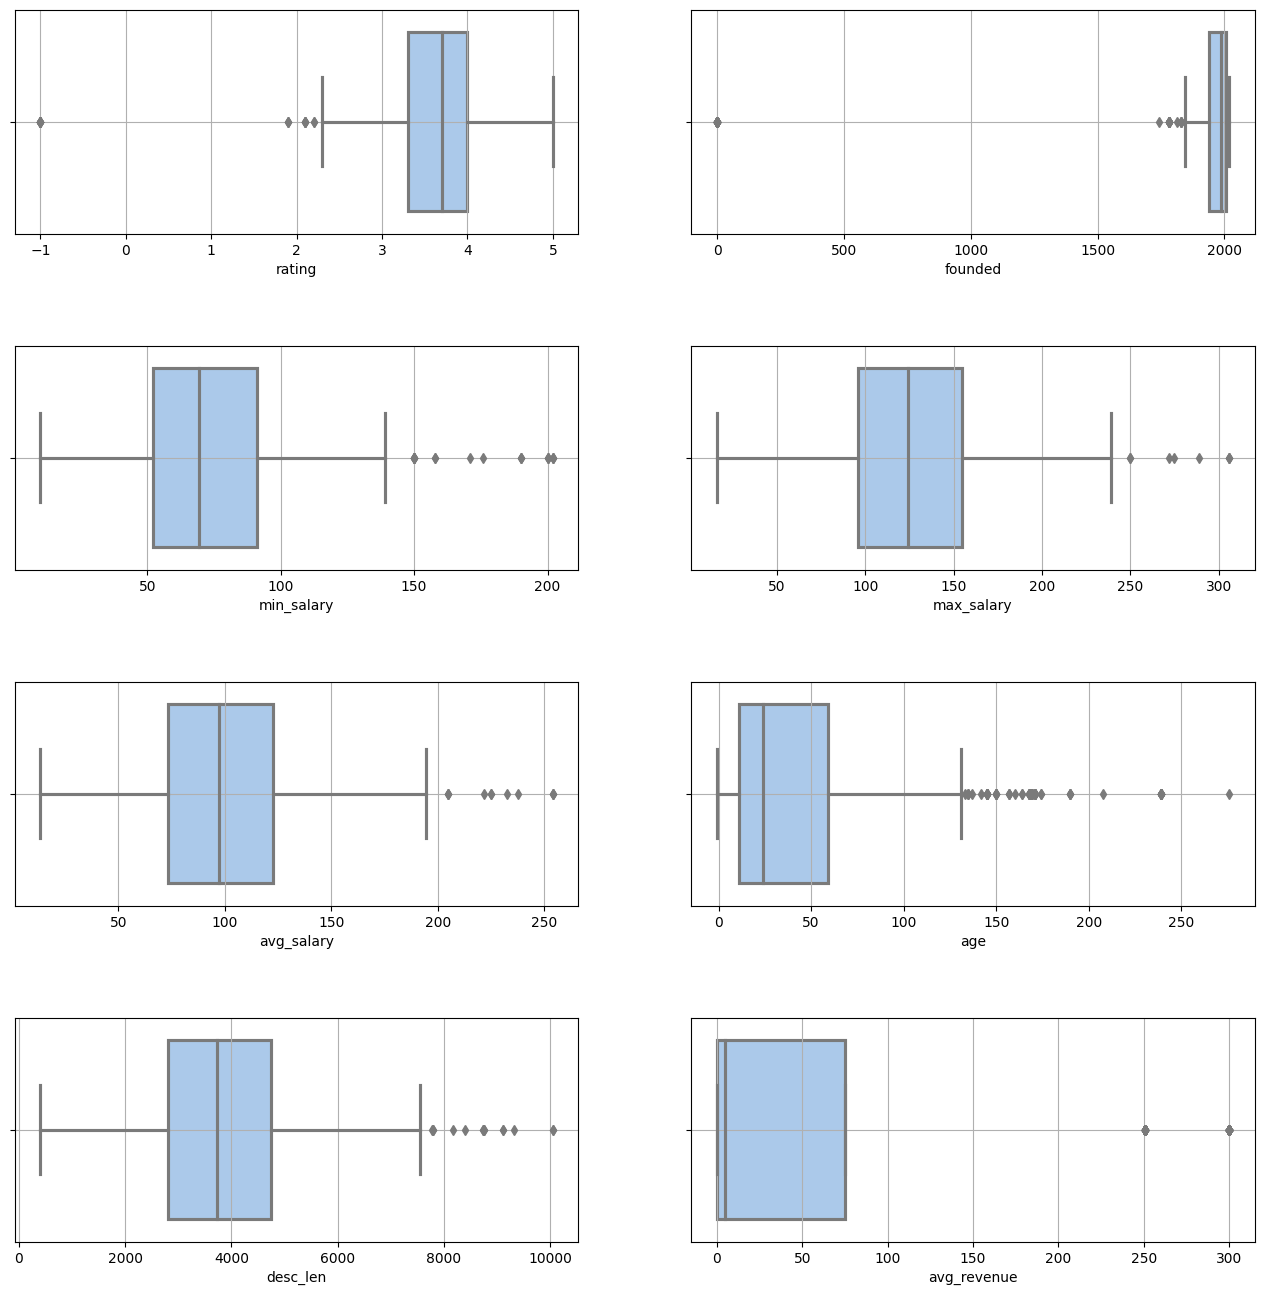

In [43]:
num_data = ['rating', 'founded', 'min_salary', 'max_salary', 'avg_salary', \
            'age', 'desc_len', 'avg_revenue']

boxplot_num(cleaned_df, num_data, int(len(num_data)/2))

### Pie Chart

<br>
Step1: count the total number of unique job in job_simple column

Step2: Draw PieChart by using matplotlib library

In [44]:
# get the no. of unique job 
noOfDs = cleaned_df.job_simp.value_counts()
noOfDs = noOfDs.sort_index()

# convert the no. of unique job to percentage
noOfDs_pct = round(noOfDs.apply(lambda x: (x/sum(noOfDs))*100), 1)
noOfDs_pct

job_simp
analyst             13.7
data engineer       16.0
data scientist      37.6
director             1.9
machine learning     3.0
manager              3.0
other               24.8
Name: count, dtype: float64

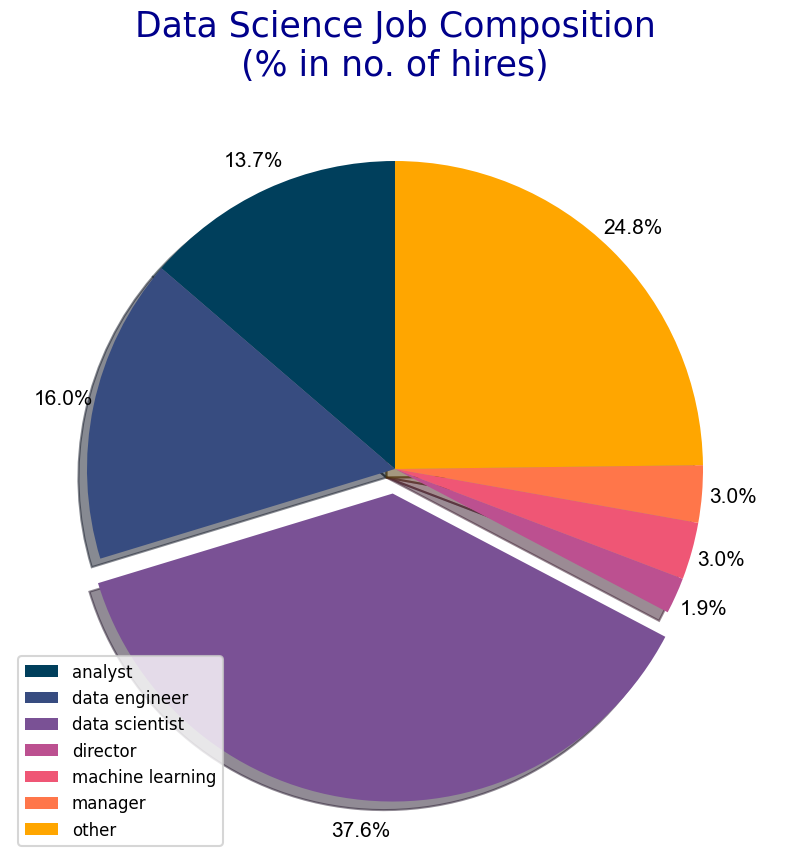

In [45]:
explodes=(0, 0, 0.08, 0, 0, 0, 0)
color = ['#003f5c', '#374c80', '#7a5195', '#bc5090', '#ef5675', '#ff764a', '#ffa600']

fig = plt.figure(figsize=(10, 10))
labels = noOfDs.index
plt.pie(noOfDs_pct,      
        explode=explodes, 
        pctdistance = 1.1, 
        autopct=lambda x: f'{x:.1f}%', 
        colors=color,  
        shadow=True, 
        startangle=90,    
        textprops={"family": "Arial", "size": 15})

plt.title('Data Science Job Composition\n(% in no. of hires)',color='darkblue',fontsize=25)
plt.legend(labels,loc=3, prop={'size': 12})
plt.show()

### Bar Chart with Point Plot

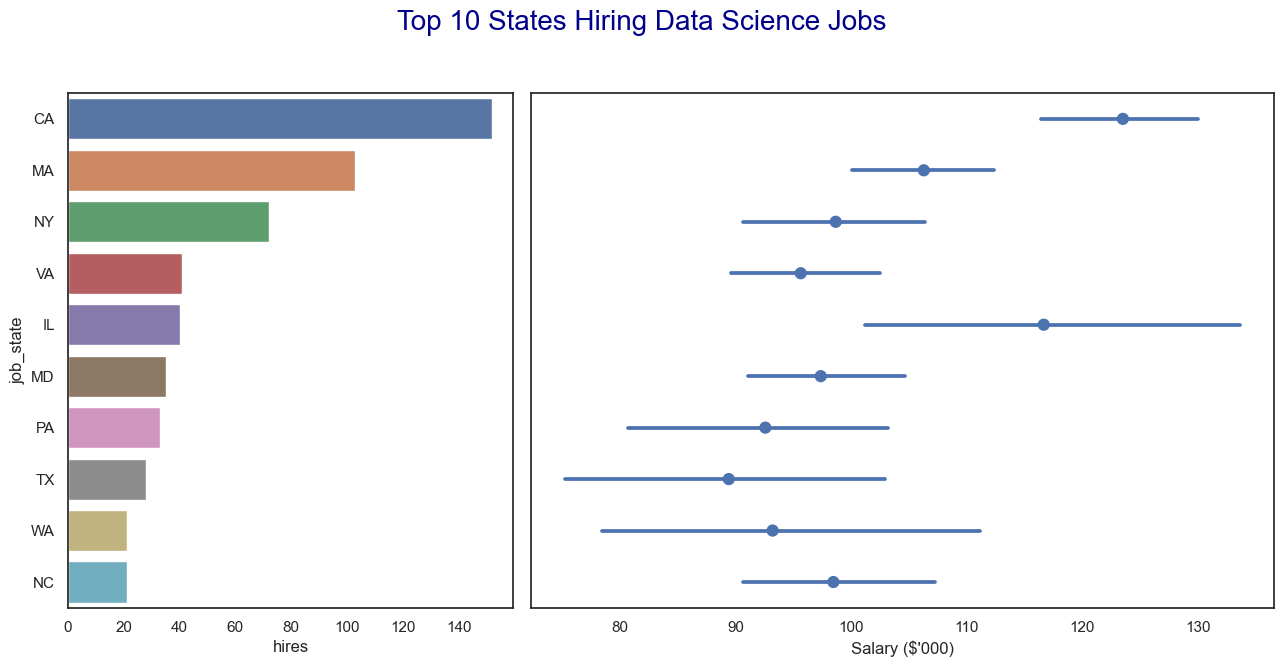

In [46]:
stateCount = cleaned_df.groupby('job_state')[['job_title']].count().reset_index() \
            .rename(columns={'job_title':'hires'}).sort_values(
            'hires', ascending=False).reset_index(drop=True).head(10)

stateCount = stateCount.merge(cleaned_df, on='job_state',how='left')
stateCount

sns.set(style="white")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='hires',y='job_state',data=stateCount,ax=ax_bar)
sns.pointplot(x='avg_salary',y='job_state',data=stateCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")
plt.suptitle('Top 10 States Hiring Data Science Jobs',fontsize=20,color='darkblue')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [47]:
# salary = cleaned_df.groupby(by='job_state')['avg_salary'].max()
salary = cleaned_df.groupby(by='job_state')['avg_salary'].sum().sort_values().reset_index()
hires = cleaned_df['job_state'].value_counts().reset_index()

merged_df = pd.merge(salary, hires, on='job_state')
merged_df = merged_df.rename(columns={'job_state':'State','count':'Hires'})

merged_df['avg_salary'] = merged_df['avg_salary']/merged_df['Hires']
merged_df['avg_salary'] = merged_df['avg_salary'].apply(lambda x: float("{:.2f}".format(x)))

merged_df.sort_values('Hires', ascending=False).head(10)

State  avg_salary  Hires
36    CA      123.51    152
35    MA      106.28    103
34    NY       98.65     72
32    VA       95.62     41
33    IL      116.66     40
31    MD       97.36     35
30    PA       92.56     33
29    TX       89.39     28
27    WA       93.19     21
28    NC       98.45     21

### Bar Chart  

In [48]:
# Display the index of first 5 job with the highest average salary
maska = cleaned_df.groupby('job_state')['avg_salary'].mean().sort_values(ascending= False).head().index
maska

Index(['CA', 'IL', 'DC', 'MA', 'NJ'], dtype='object', name='job_state')

In [49]:
# Show the skill required by each stage with the top 5 highest average salary
maskb = cleaned_df.groupby('job_state')[['python_yn', 'r_yn', 'spark','aws','excel']].sum()\
.loc[['CA', 'IL', 'DC', 'MA', 'NJ'], :].reset_index()

maskb

job_state  python_yn  r_yn  spark  aws  excel
0        CA         92    54     50   41     85
1        IL         28    24      9   10     17
2        DC          4     3      3    5      8
3        MA         41    35     22   19     58
4        NJ          9     7      0    5     14

In [50]:
fig = px.bar(data_frame=maskb, x= "job_state", y=['python_yn', 'r_yn', 'spark', 'aws', 'excel'], barmode= "group")
fig.update_layout(xaxis_title="Highest Salary States", yaxis_title="Programing skill required", 
                  title = 'Top 5 States Salary x Skills Required')
fig.show()

### Bar Chart with Pivot Table

In [51]:
import math
pivot_df = pd.pivot_table(cleaned_df, index='job_simp', columns='seniority', values='avg_salary')

# re-arrange the order of columns
pivot_df = pivot_df[['jr', 'senior', 'none']]

# Replace nan value with 0
pivot_df = pivot_df.fillna(0)

# re format dataframe
display(pivot_df.round(2))

# Bar Chart
fig = px.bar(data_frame=pivot_df, barmode= "group")
fig.update_layout(xaxis_title="Job Relates to Data Science", yaxis_title="Average Salary", 
                  title = 'Average Salary for each Job Group By Seniority')
fig.show()

seniority             jr  senior    none
job_simp                                
analyst            53.25   79.09   61.31
data engineer       0.00  124.69   96.70
data scientist    106.50  138.96  107.04
director            0.00    0.00  168.61
machine learning    0.00  142.07  119.13
manager             0.00    0.00   84.02
other               0.00  109.06   73.99

In [52]:
df_new = cleaned_df[['python_yn',
                     'r_yn',
                     'spark',
                     'aws',
                     'excel']]

legend_name = ['Python Skill',
               'R Language', 
               'Spark Skill',
               'AWS Skill', 
               'Excel Skill']

for i, j in zip(df_new.columns, legend_name):
    pivot_df = pd.pivot_table(cleaned_df, index='job_simp', columns=i, values='avg_salary', aggfunc='count')

    # Replace nan value with 0
    pivot_df = pivot_df.fillna(0)

    # re format dataframe
    display(pivot_df)

    # Bar Chart
    fig = px.bar(data_frame=pivot_df, barmode= "group", labels={i: j})
    fig.update_layout(xaxis_title="Data Science Job", yaxis_title="Average Salary", 
                      title = 'Average Salary provided based on the job and {} required'.format(j))
    fig.show()

python_yn           0    1
job_simp                  
analyst            70   32
data engineer      42   77
data scientist     62  217
director            6    8
machine learning    4   18
manager            16    6
other             149   35

r_yn                0    1
job_simp                  
analyst            72   30
data engineer     113    6
data scientist    123  156
director            8    6
machine learning   20    2
manager            17    5
other             142   42

spark                 0     1
job_simp                     
analyst            96.0   6.0
data engineer      52.0  67.0
data scientist    199.0  80.0
director           14.0   0.0
machine learning   18.0   4.0
manager            21.0   1.0
other             175.0   9.0

aws                 0   1
job_simp                 
analyst            92  10
data engineer      60  59
data scientist    203  76
director           11   3
machine learning   16   6
manager            20   2
other             164  20

excel               0    1
job_simp                  
analyst            24   78
data engineer      65   54
data scientist    141  138
director            9    5
machine learning   15    7
manager             6   16
other              94   90

### JointPlot 

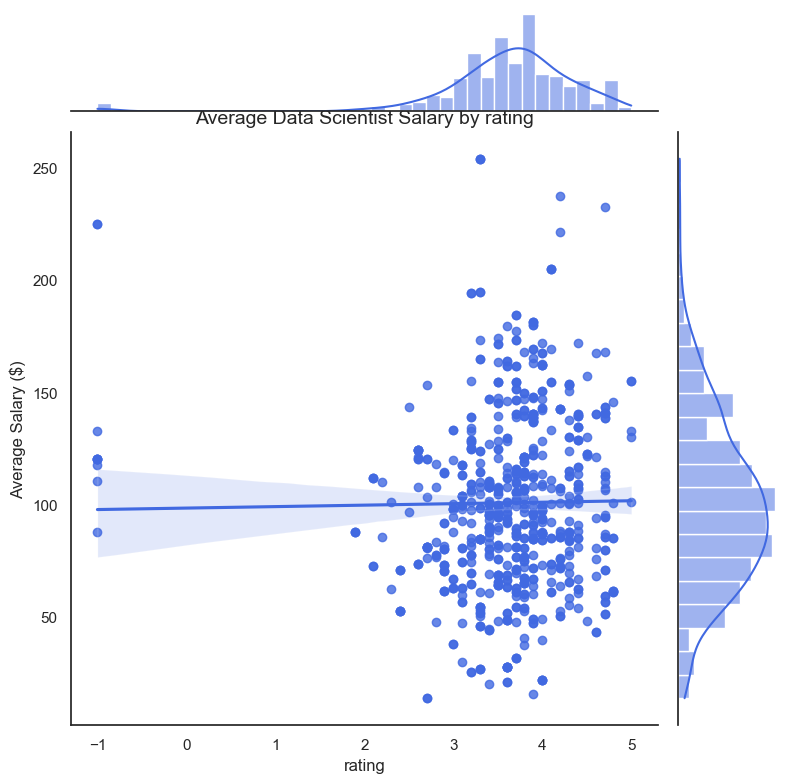

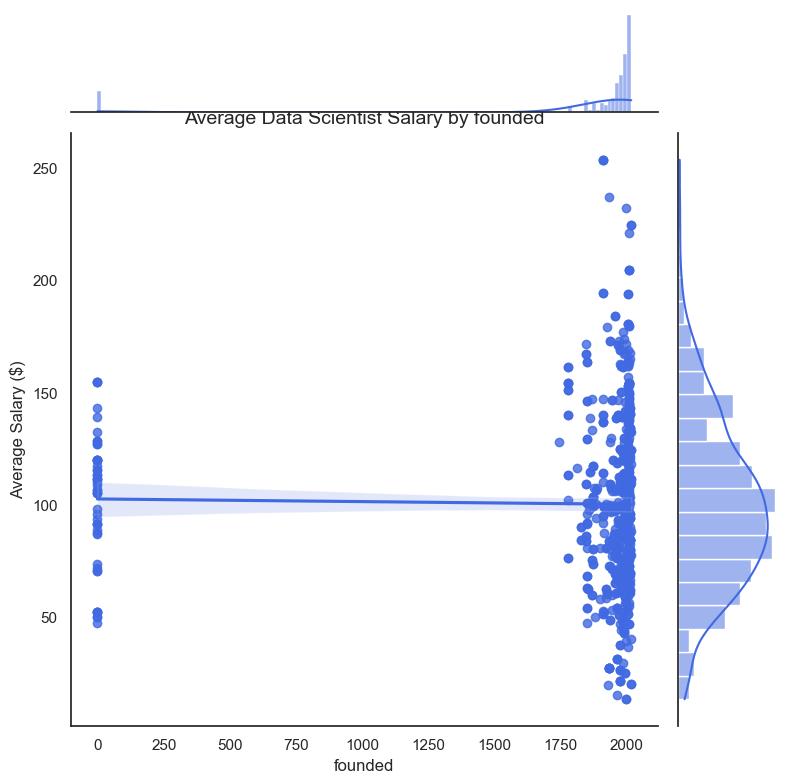

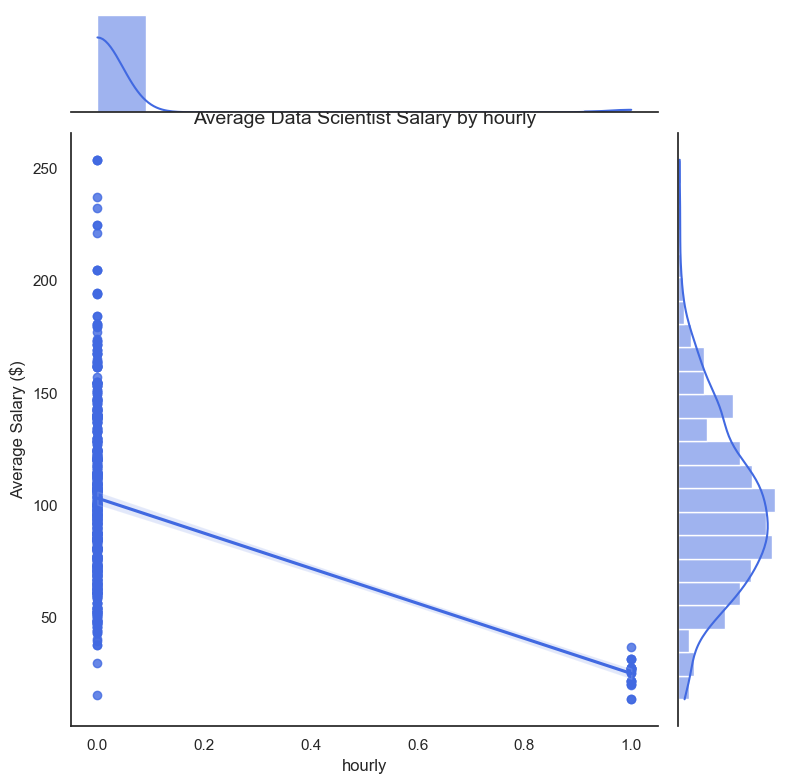

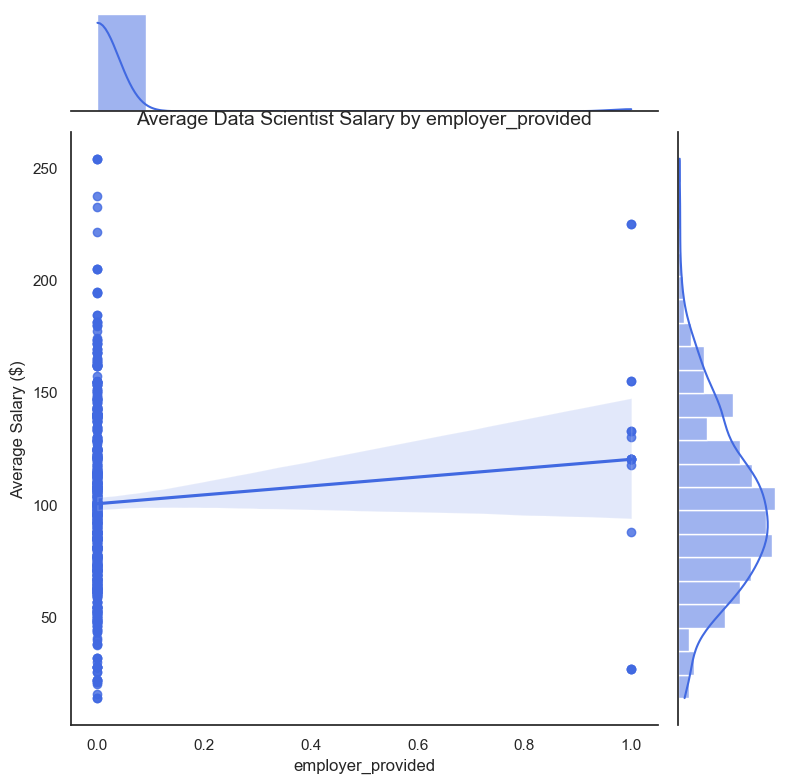

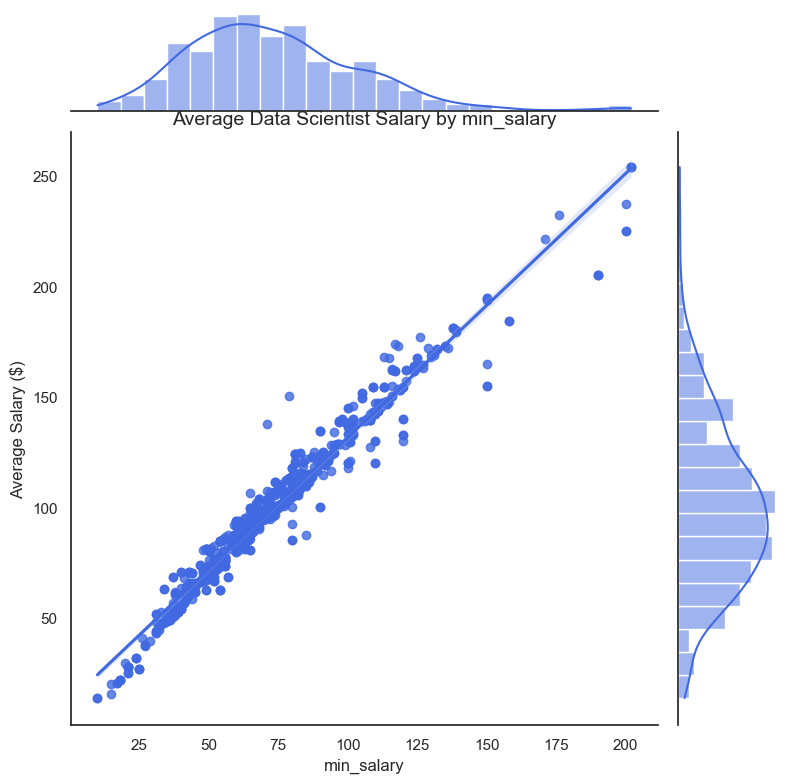

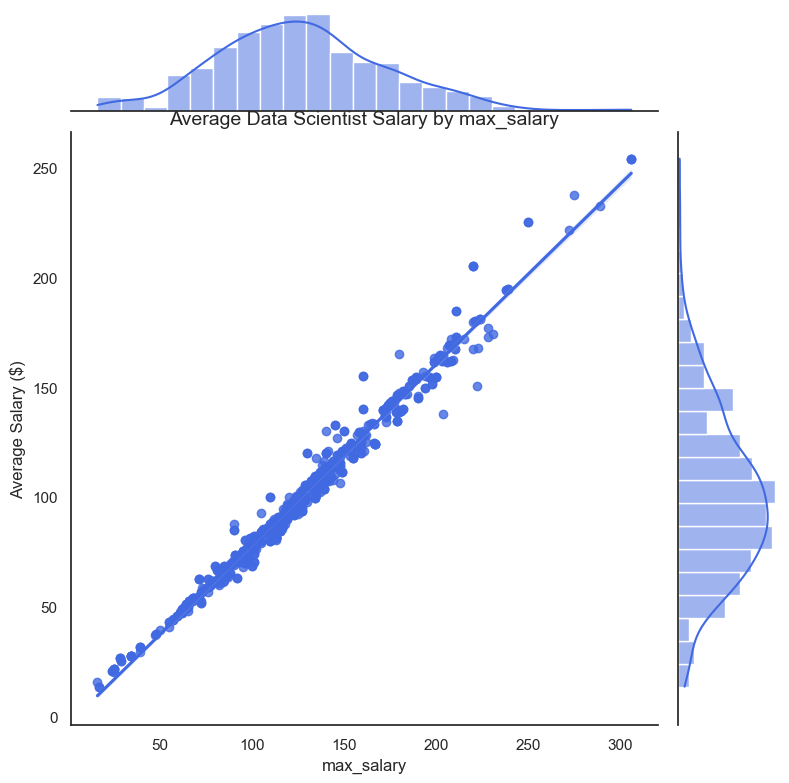

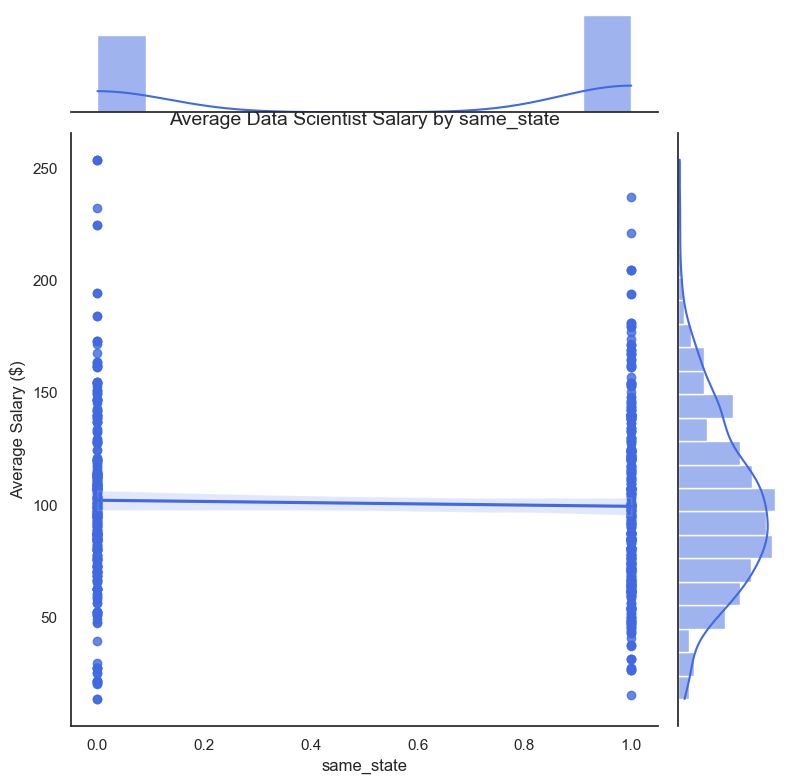

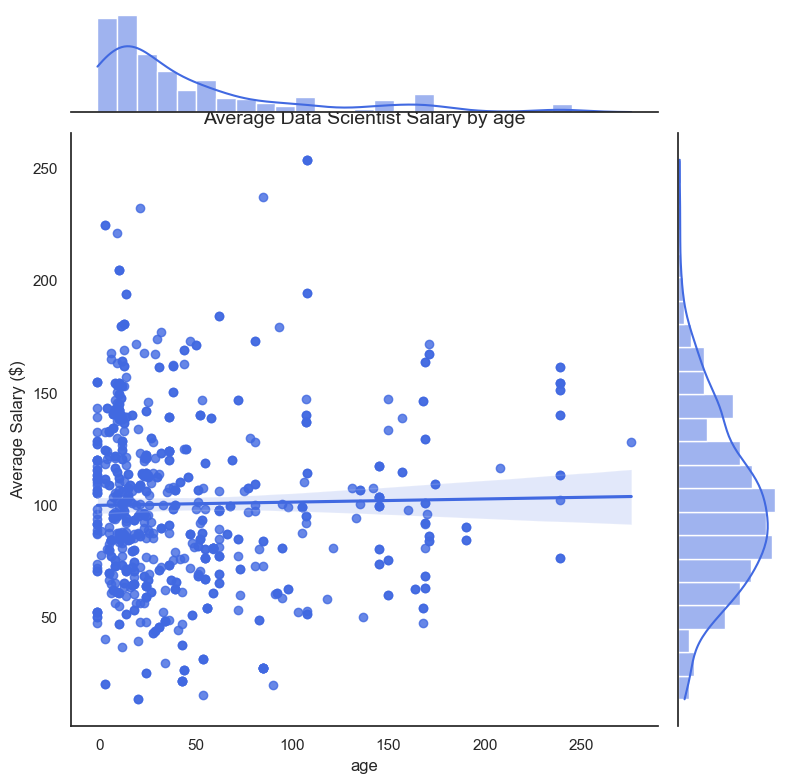

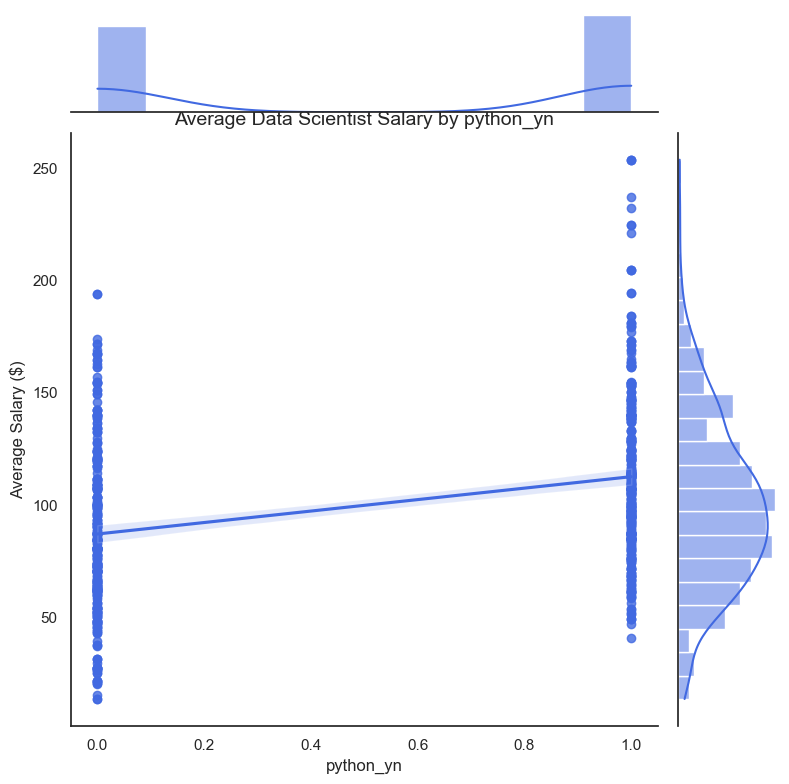

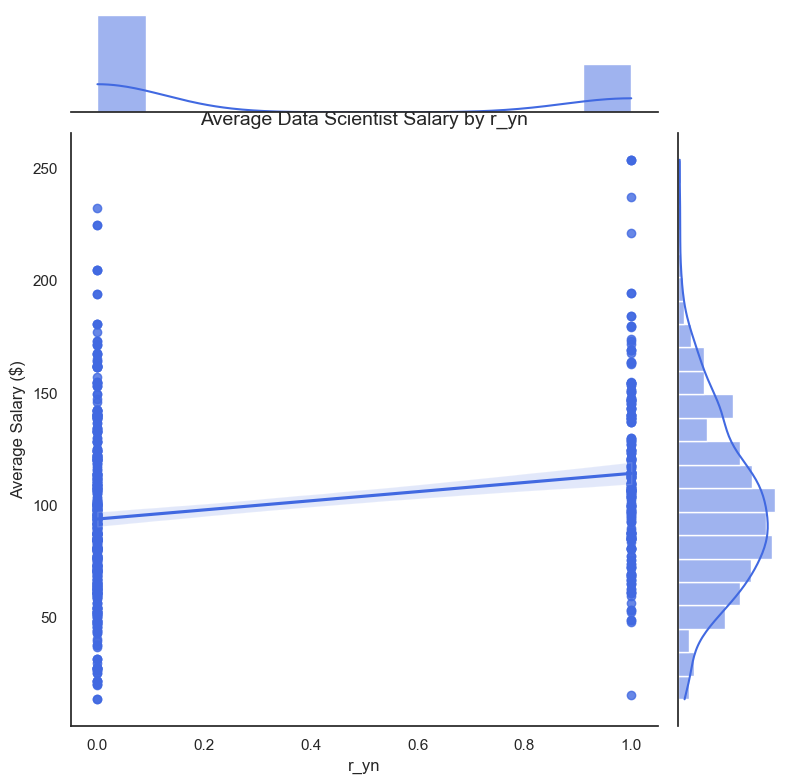

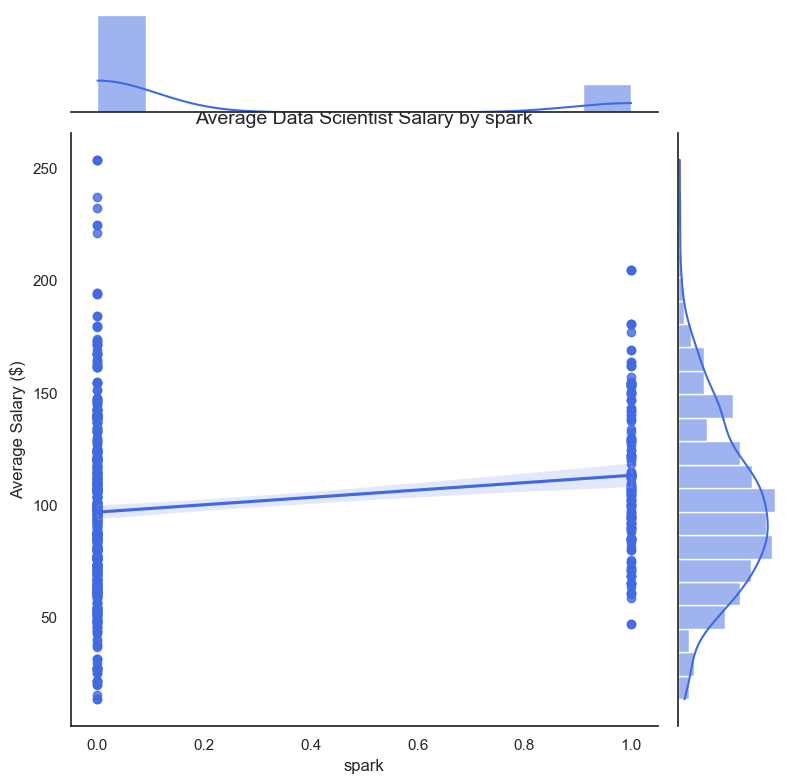

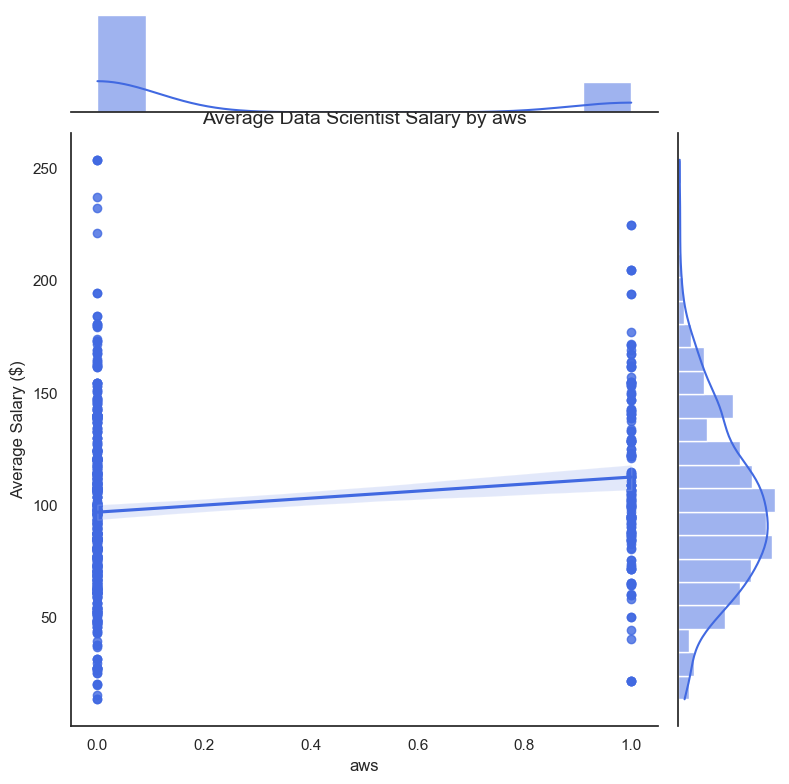

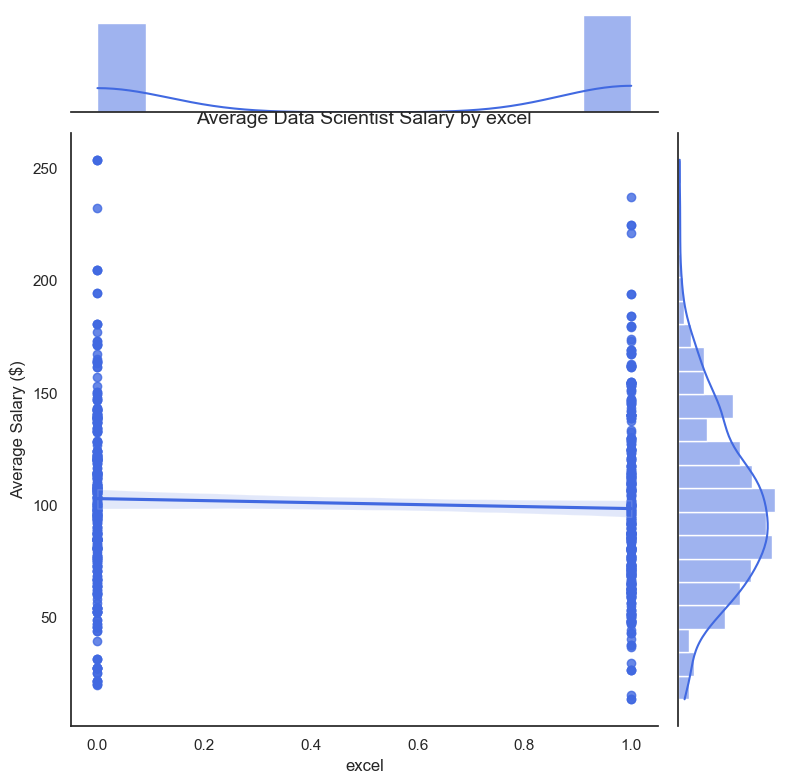

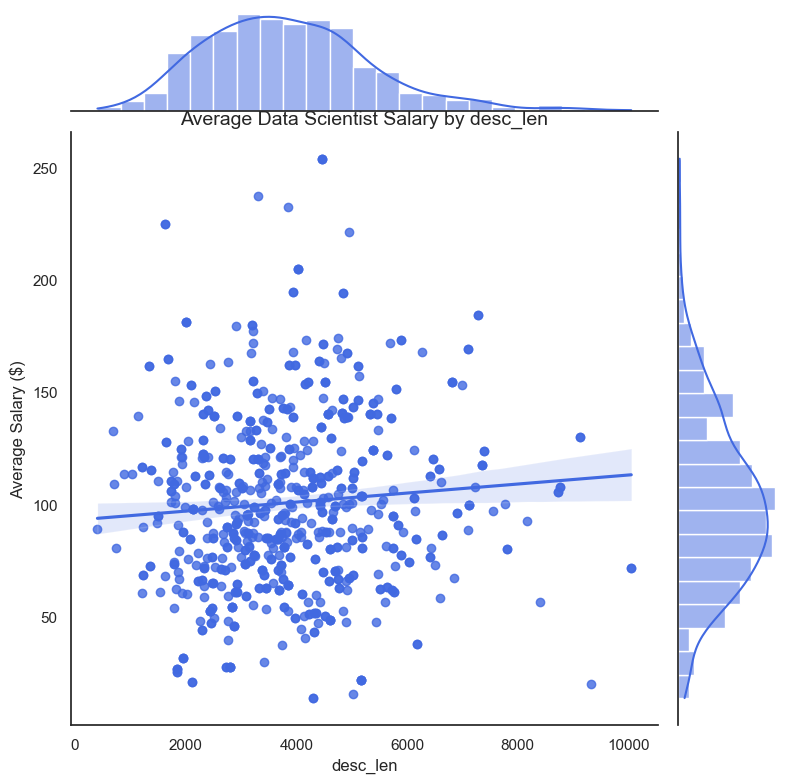

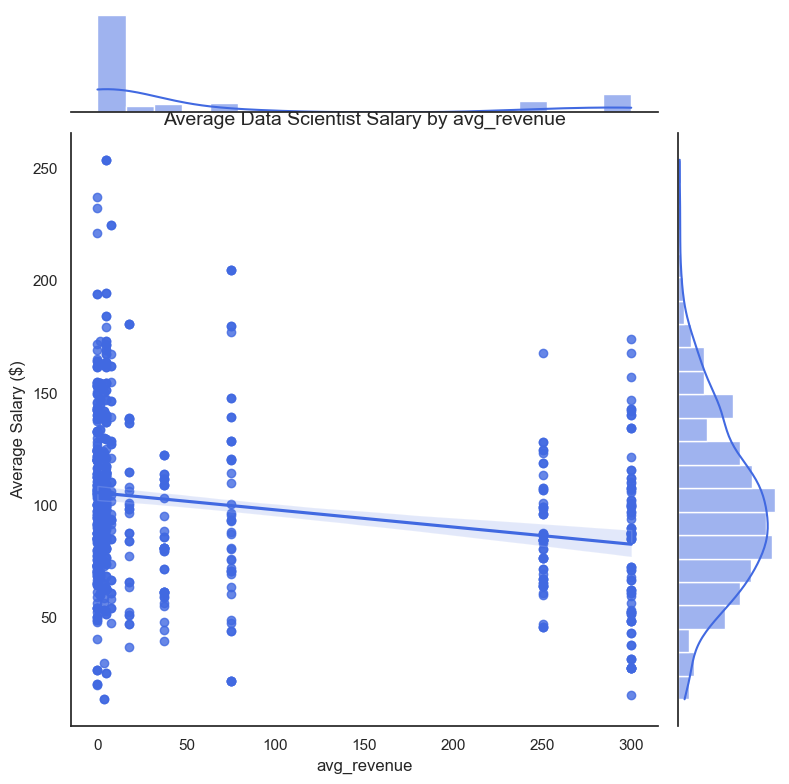

In [53]:
df_new = cleaned_df[['rating', 
                     'founded',
                     'hourly', 
                     'employer_provided',
                     'min_salary',
                     'max_salary',
                     'same_state',
                     'age',
                     'python_yn',
                     'r_yn',
                     'spark',
                     'aws',
                     'excel',
                     'desc_len',
                     'avg_revenue']]

for i in df_new.columns:
    chart = sns.jointplot(x=i, y='avg_salary', data=cleaned_df, 
                          kind="reg", height=8, color='royalblue')

    # Add labels and title
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Average Salary ($)', fontsize=12)
    plt.title('Average Data Scientist Salary by {}'.format(i), fontsize=14)

    plt.show()


### Heat Map

In [54]:
newdf = cleaned_df.select_dtypes(include=np.number)

<Axes: >

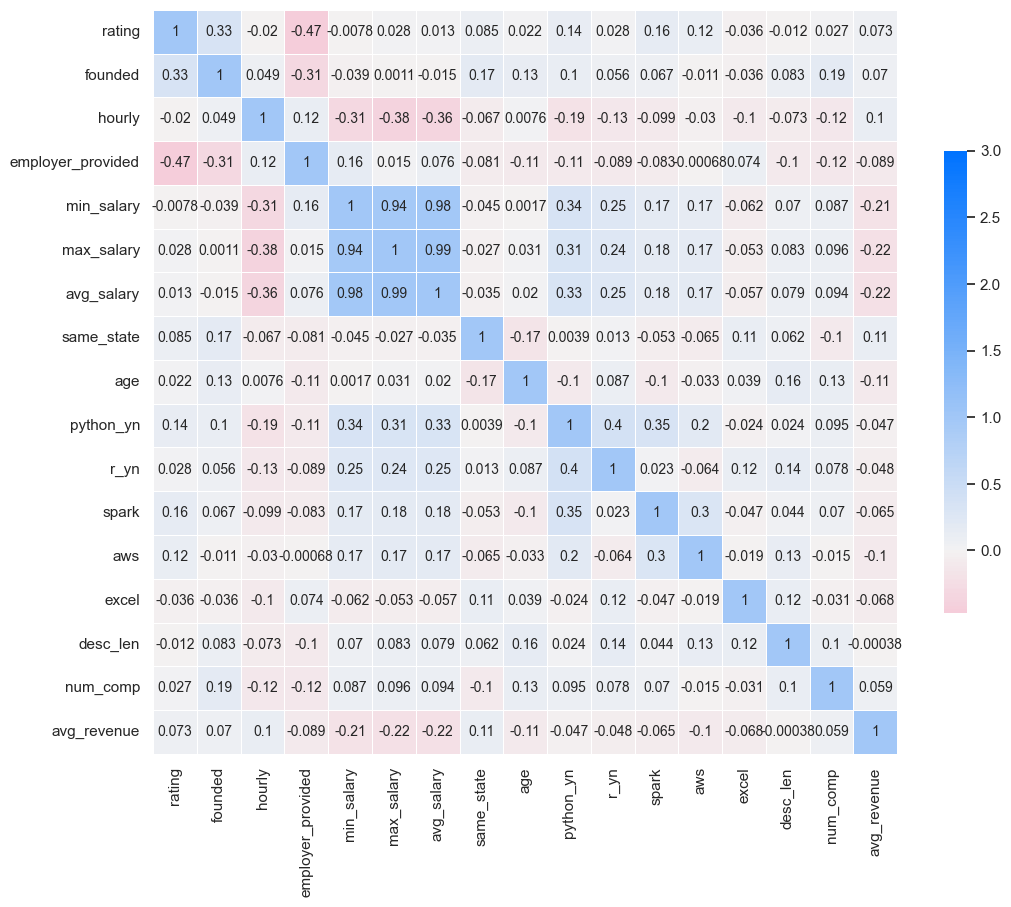

In [55]:
cmap = sns.diverging_palette(0, 255, 150, as_cmap=True)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(newdf.corr(), annot=True, annot_kws={"fontsize":10},  vmax=3, center=0, cmap = cmap,
                square=True, linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax)

In [56]:
# Calculate correlation matrix
corr_matrix = newdf.corr()

# Extract correlation values for target variable ('target_var')
corr_with_target = corr_matrix['avg_salary']

# Create dataframe with correlation values for each variable with target variable
corr_df = pd.DataFrame(corr_with_target)
corr_df.columns = ['correlation_with_target']

# Sort dataframe by descending correlation values
corr_df = corr_df.sort_values(by='correlation_with_target', ascending=False)

# Display dataframe
print(corr_df)

                   correlation_with_target
avg_salary                        1.000000
max_salary                        0.990833
min_salary                        0.980031
python_yn                         0.328499
r_yn                              0.246946
spark                             0.176559
aws                               0.171379
num_comp                          0.093813
desc_len                          0.078808
employer_provided                 0.076287
age                               0.019655
rating                            0.013492
founded                          -0.015149
same_state                       -0.034641
excel                            -0.057252
avg_revenue                      -0.217023
hourly                           -0.356082


### 3D Scatter Plot

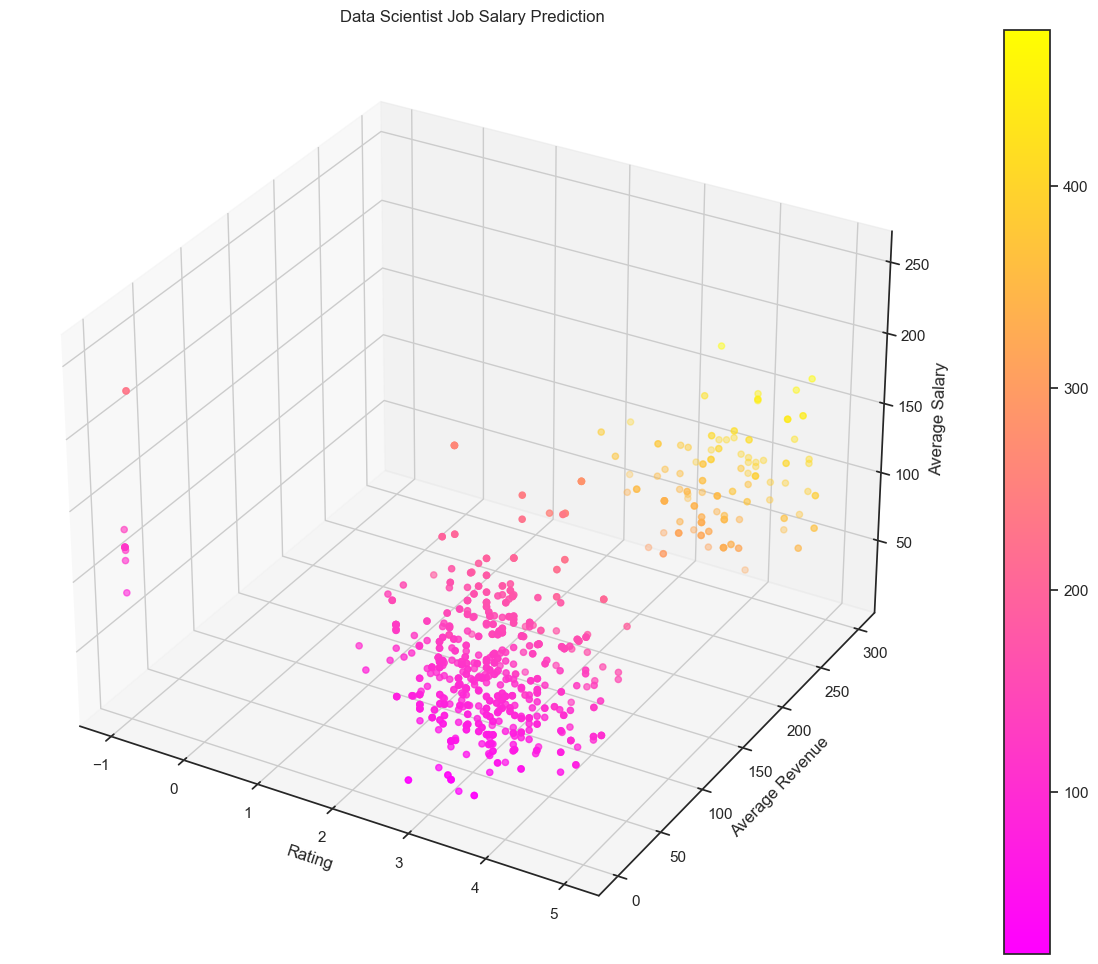

In [57]:
# Create 3D scatter plot
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111, projection='3d')

# Create color map
color_map = plt.get_cmap('spring')

x=cleaned_df['rating']
y=cleaned_df['avg_revenue']
z=cleaned_df['avg_salary']

# Create scatter plot and colorbar
scatter = ax.scatter3D(x, y, z,
                       c=(x+y+z), cmap=color_map)

# Set colorbar
plt.colorbar(scatter)

# Set labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Average Revenue')
ax.set_zlabel('Average Salary')
ax.set_title('Data Scientist Job Salary Prediction')

# Show plot
plt.show()

### WordCloud - Job Description

In [58]:
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
from string import punctuation
import collections

stop_words = set(stopwords.words('english')) 

In [59]:
# To obtain the full width of a cell in a dataframe
desc = cleaned_df.loc[1,'job_description']

# Creating a list of words from all the job descriptions in train_df1 data
all_desc = []
for i in range(0,cleaned_df.shape[0]):
    desc = cleaned_df.loc[i,'job_description']
    desc1 = desc.lower()
    
    # Removing numbers, *** and www links from the data
    desc2 = re.sub('[0-9]+\S+|\s\d+\s|\w+[0-9]+|\w+[\*]+.*|\s[\*]+\s|www\.[^\s]+','',desc1)
    
    # Removing punctuation
    for p in punctuation:
        desc2 = desc2.replace(p,'')
    all_desc.append(desc2)

In [60]:
# Creating word tokens for all the descriptions
final_list = []
for desc in all_desc:
    word_list = word_tokenize(desc)
    final_list.extend(word_list)

In [61]:
# Excluding stopwords from the analysis
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

list_wo_stopwords = []
for w in final_list:
    if w not in stop_words:
        list_wo_stopwords.append(w)

words  freq
0           data  7649
27    experience  3890
64          team  2251
63          work  2195
13      business  1786
15         skill  1550
14       science  1415
223  development  1366
68       ability  1353
19      analysis  1211

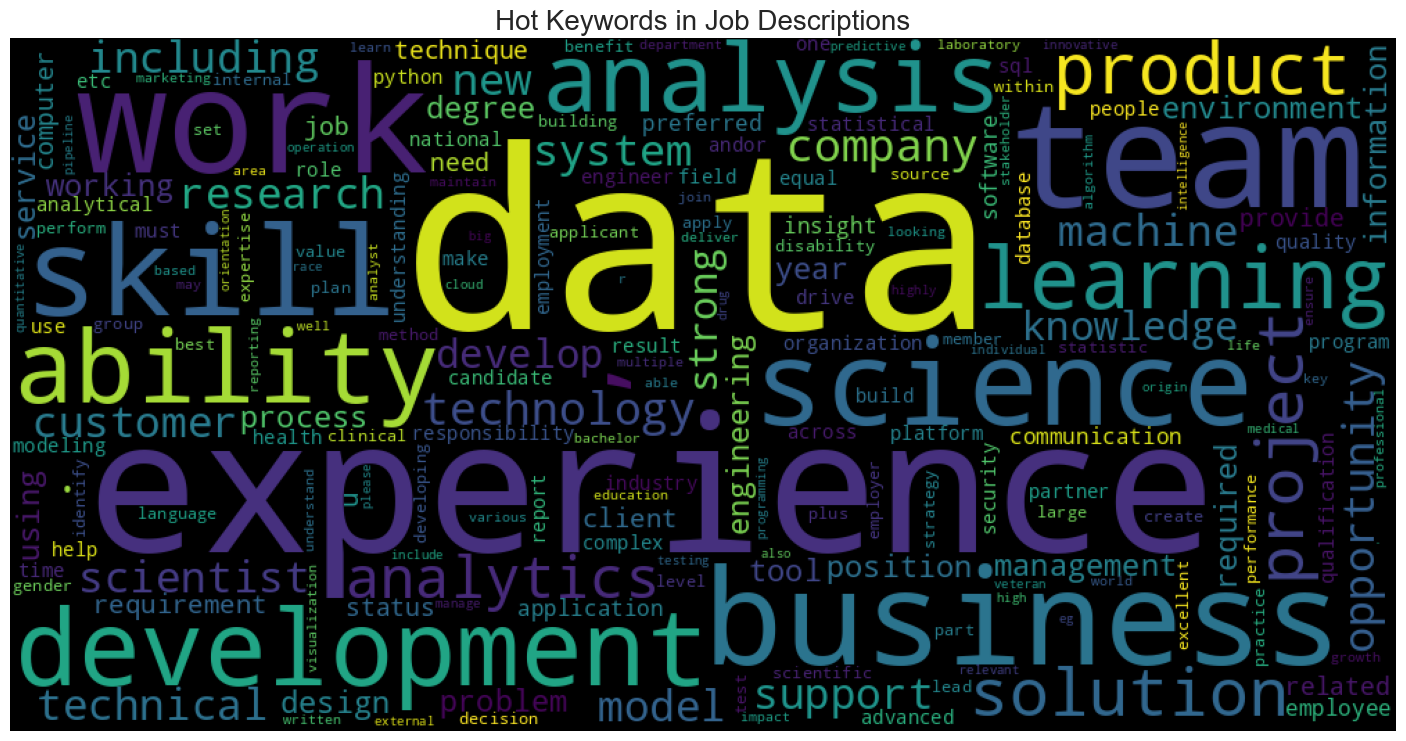

In [62]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization without specifying parts of speech
list_lemmatized = []
for word in list_wo_stopwords:
    list_lemmatized.append(lemmatizer.lemmatize(word))

word_freq_lem = dict(collections.Counter(list_lemmatized))
keys = list(word_freq_lem.keys())
values = list(word_freq_lem.values())
df_lem = pd.DataFrame({'words':keys,'freq':values})

# Show the top 10 frequent word in Job Description Column
display(df_lem.sort_values(by = 'freq',ascending = False)[:10])

from wordcloud import WordCloud
from collections import Counter
word_could_dict=Counter(word_freq_lem)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(19,9))
plt.axis('off')
plt.title("Hot Keywords in Job Descriptions",fontsize=20)
plt.imshow(wordcloud)
plt.show()

###  *Data Preprocessing*

#### Detect and Delete outliers

In [63]:
for x in num_data:
    q25 = cleaned_df.describe()[x]['25%']
    q75 = cleaned_df.describe()[x]['75%']

    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    # Find outliers
    outliers_return = cleaned_df[x][(cleaned_df[x] > max) | (cleaned_df[x] < min)]
    print(len(outliers_return))
    
    cleaned_df.loc[cleaned_df[x] < min,x] = cleaned_df.describe()[x]['mean']
    cleaned_df.loc[cleaned_df[x] > max,x] = cleaned_df.describe()[x]['mean']

21
70
20
8
11
81
14
148


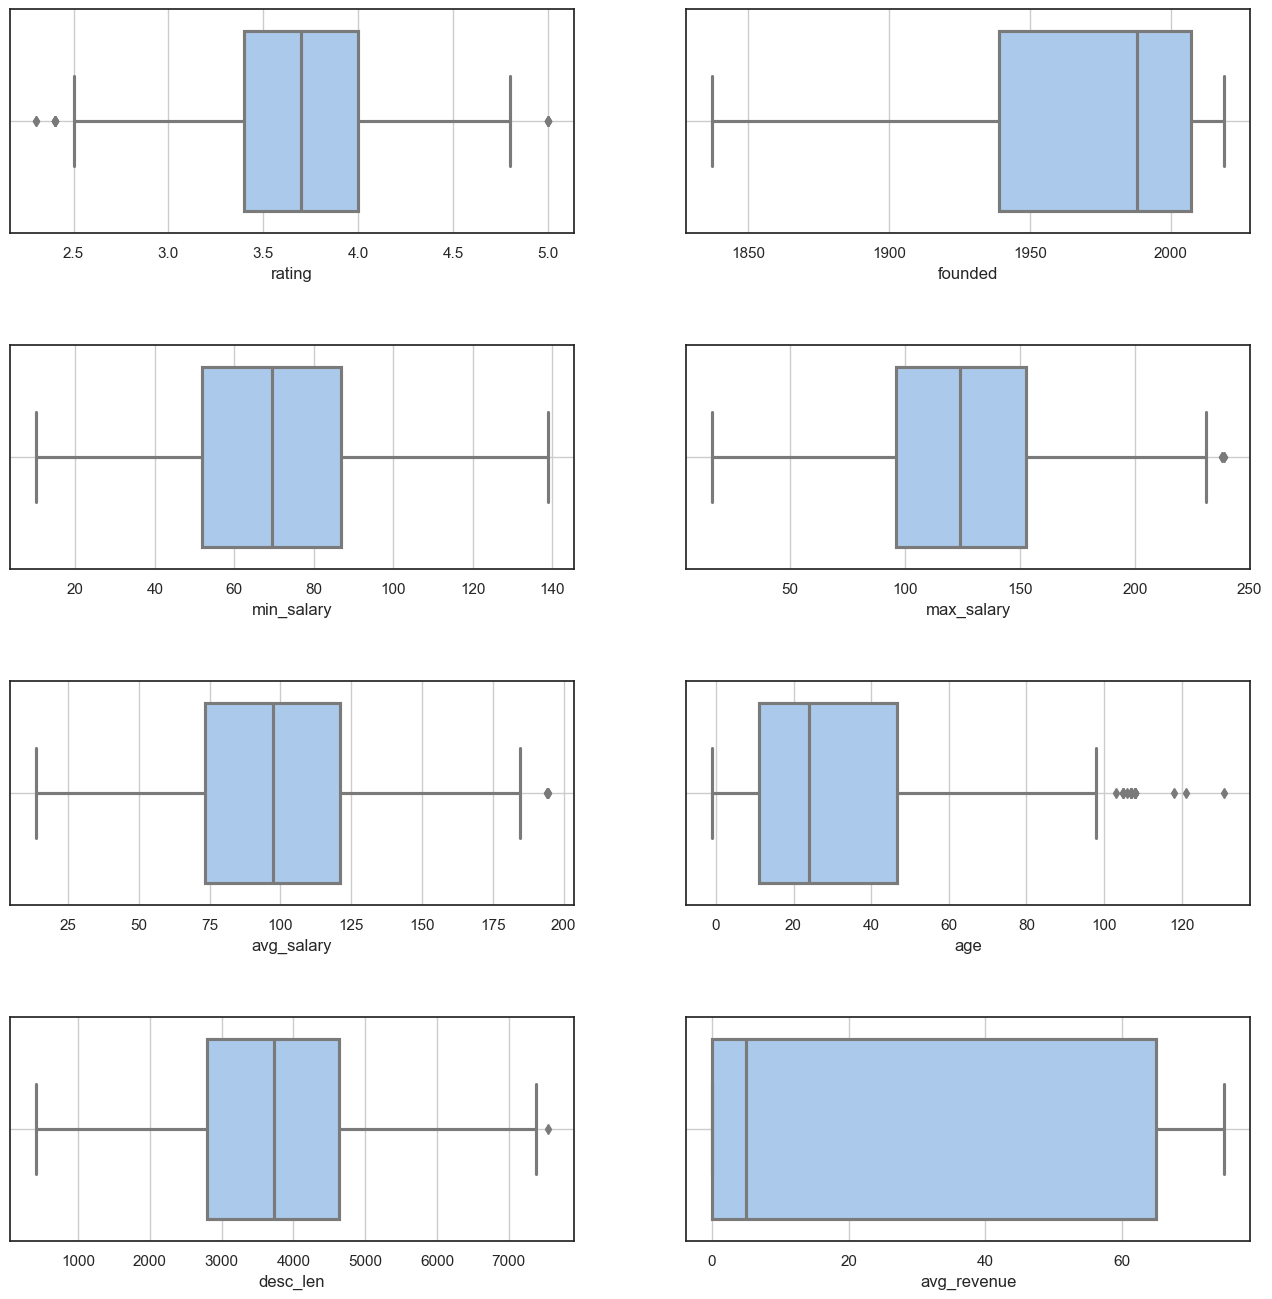

In [64]:
boxplot_num(cleaned_df, num_data, int(len(num_data)/2))

#### Import Libraries

In [65]:
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from sklearn.feature_selection import f_classif, chi2
from sklearn import preprocessing

#### Scaling and Labelling

In [66]:
#select only the numeric columns in the DataFrame
df_numeric = cleaned_df.select_dtypes(include=np.number)

#select only the category columns in the DataFrame
df_categoric = cleaned_df.select_dtypes(exclude='number')

In [67]:
# Scalling data sample
scaler = MinMaxScaler()
lb = LabelBinarizer()

scaled_data = pd.DataFrame(scaler.fit_transform(df_numeric),columns=df_numeric.columns)

for n in df_categoric:
    df_categoric[n] = lb.fit_transform(df_categoric[n])

# concatenate the two dataframes column-wise
preprocessed_df = pd.concat([scaled_data, df_categoric], axis=1)

# display the preprocessed dataframe
preprocessed_df.shape

(742, 33)

#### Chi-Square

In [68]:
# Split the label and input variable
y = preprocessed_df['avg_salary']
X = preprocessed_df.drop('avg_salary', axis=1)

# transforms the categorical labels into numerical values.
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

In [69]:
# Get the chi2 scores for all features
scores = chi2(X, y_transformed)[0]

# Sort the columns by their scores in descending order
sorted_columns = X.columns[np.argsort(scores)[::-1]]

chi_df = pd.DataFrame(scores[np.argsort(scores)[::-1]][:32], sorted_columns[:32], columns=['Scores'])
chi_df

Scores
salary_estimate    740.000000
hourly             718.000000
job_description    492.666667
job_simp           432.688280
job_state          423.729167
ownership_type     415.711111
employer_provided  392.907605
size               390.862903
aws                336.528007
spark              291.125903
revenue            287.674646
industry           278.967778
r_yn               268.802728
avg_revenue        193.132566
excel              193.079350
python_yn          192.096188
headquarters       184.500000
seniority          182.500000
num_comp           177.657468
same_state         164.374300
competitors        154.242534
location           147.400000
sector             147.400000
company_name       105.000000
company_txt        105.000000
job_title          105.000000
min_salary          66.345539
age                 64.600460
founded             58.043459
max_salary          57.497773
desc_len            31.326737
rating              27.337495

#### Feature Selection - Drop Unnecessary Column

In [70]:
cleaned_df = preprocessed_df.drop(['rating', 
                                        'founded', 
                                        'desc_len', 
                                        'min_salary',
                                        'max_salary',
                                        'age', 
                                        'job_title', 
                                        'company_txt', 
                                        'company_name']
                                       , axis=1)
cleaned_df.shape

(742, 24)

#### Train and Test Split 

In [71]:
from sklearn.model_selection import train_test_split

def trainTestSplit(dataset_df):
    y = dataset_df['avg_salary']
    X = dataset_df.drop('avg_salary', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 42)
    
    return X_train, X_test, y_train, y_test

In [72]:
X_train, X_test, y_train, y_test = trainTestSplit(cleaned_df)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(519, 23) (519,) (223, 23) (223,)


In [73]:
wo_X_train, wo_X_test, wo_y_train, wo_y_test = trainTestSplit(preprocessed_df)

print(wo_X_train.shape, wo_y_train.shape, wo_X_test.shape, wo_y_test.shape)

(519, 32) (519,) (223, 32) (223,)


### *Modelling* 

##### Import Libraries 

In [74]:
from numpy import arange
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, RepeatedKFold, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score, mean_squared_log_error

# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# XG Boost
import xgboost as xgb
from xgboost import XGBRegressor

# Random Forest
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

#### *Standard Modelling* 

In [79]:
# define models
models = {
            'Decision Tree Regression': DecisionTreeRegressor(),
            'XGBoost': xgb.XGBRegressor(),
            'Lasso Regression': Lasso(alpha=1.0),
            'Random Forest Regression': RandomForestRegressor(random_state=42),
            'Gradient Boosting': GradientBoostingRegressor(random_state=42)
        }

In [80]:
def standardModelling(models, X_train, y_train, X_test, y_test):
    # Define dataframe
    temp_df = pd.DataFrame(columns=['R-squared', 'standard_deviation'], index=models.keys())
    
    # Evaluate each model using 10-fold cross-validation
    accuracy_scores = []
    std = []
    model_name = []
    
    for key in models.keys():
        cv_results = cross_val_score(models[key], X_train, y_train, cv=10, scoring='r2')
        accuracy_scores.append(cv_results.mean()*100)
        std.append(cv_results.std())
    
    temp_df['R-squared'] = accuracy_scores
    temp_df['standard_deviation'] = std
    temp_df.index.name = 'Model'
    
    return temp_df

In [83]:
# Data after performing feature selection
temp_df = standardModelling(models, X_train, y_train, X_test, y_test)
styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "120%"),
                              ("color", 'Blue')])]
temp_df = temp_df.style.set_caption("Standard Modelling after performing feature selection")\
           .set_table_styles(styles)
display(temp_df)

# Data without perform feature selection
temp_df = standardModelling(models, wo_X_train, wo_y_train, wo_X_test, wo_y_test)
styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "120%"),
                              ("color", 'Blue')])]
temp_df = temp_df.style.set_caption("Standard Modelling without performing feature selection")\
           .set_table_styles(styles)
display(temp_df)

#### *Identify Importance Feature for each model*

In [84]:
def featureEvaluationPlot(key, importance_scores, wo_X_train):
    # Show top 5 most important features
    feat_importances = pd.Series(importance_scores, index=wo_X_train.columns)
    feat_importances.nlargest(5).plot(kind='barh')
    plt.title('Top 5 Most Important Features for {}'.format(key))
    plt.show()
    
    # Show zero scores features
    coef_features = list(zip(wo_X_train, importance_scores))
    # Calling DataFrame constructor on list 
    coef_features_df = pd.DataFrame(coef_features, columns=['features', 'coefficient']) 
    coef_features_df = coef_features_df[coef_features_df['coefficient']==0]
    
    styles = [dict(selector="caption",
               props=[("text-align", "center"),
                      ("font-size", "120%"),
                      ("color", 'Blue')])]
    coef_features_df = coef_features_df.style.set_caption("Features with zero scores ").set_table_styles(styles)
    display(coef_features_df)
    
    return coef_features_df.data['features']

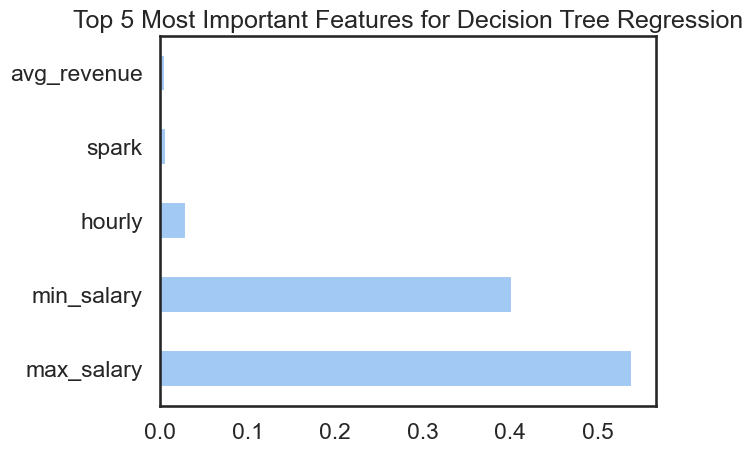

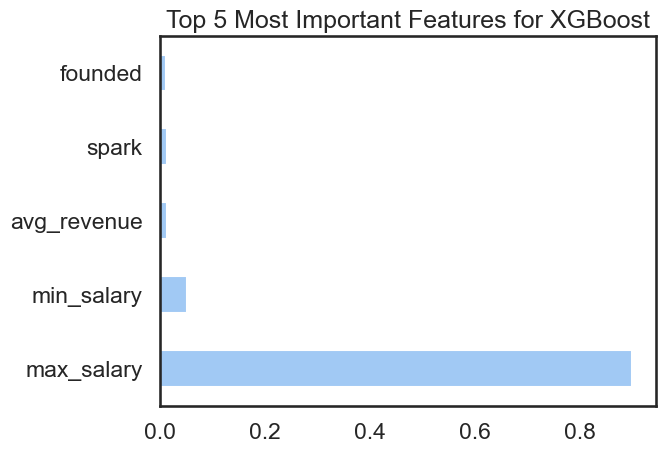

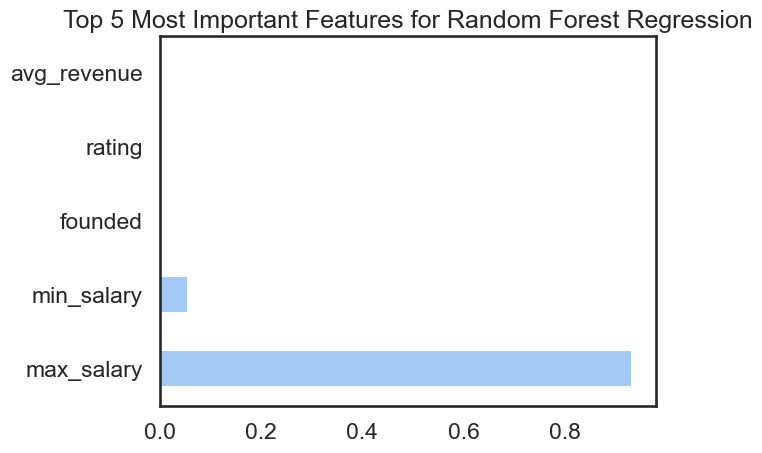

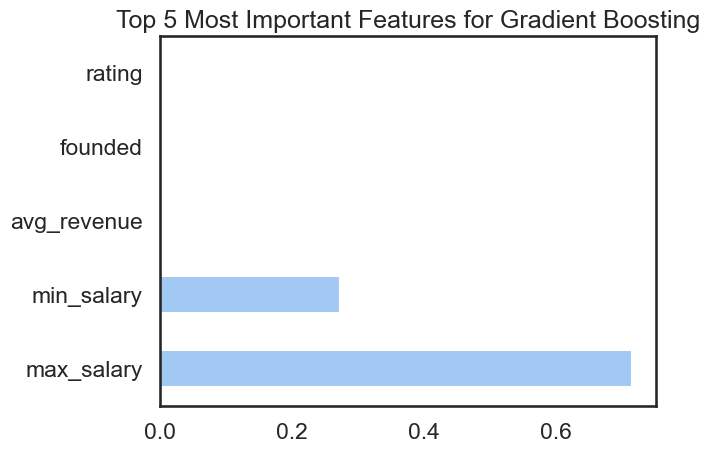

In [85]:
# define models
models_feature = {
                'Decision Tree Regression': ExtraTreesRegressor(),
                'XGBoost': xgb.XGBRegressor(),
                'Random Forest Regression': RandomForestRegressor(),
                'Gradient Boosting': GradientBoostingRegressor()
        }

def importantFeatures(models):
    zeroCoef_arr = []
    for key in models.keys():
        models[key].fit(wo_X_train, wo_y_train)
        importance_scores = models[key].feature_importances_
        zeroCoef_df = featureEvaluationPlot(key, importance_scores, wo_X_train)
        # Get the features that need to remove
        zeroCoef_arr.append(zeroCoef_df.tolist())
        
    return zeroCoef_arr

zeroCoef_arr = importantFeatures(models_feature)

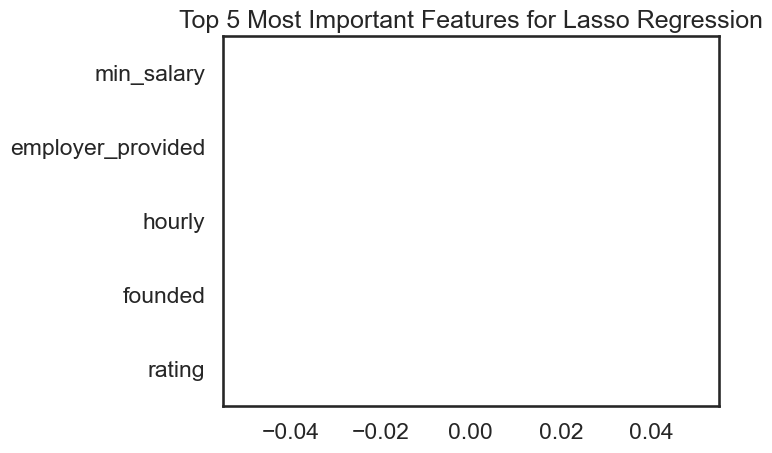

0                rating
1               founded
2                hourly
3     employer_provided
4            min_salary
5            max_salary
6            same_state
7                   age
8             python_yn
9                  r_yn
10                spark
11                  aws
12                excel
13             desc_len
14             num_comp
15          avg_revenue
16            job_title
17      salary_estimate
18      job_description
19         company_name
20             location
21         headquarters
22                 size
23       ownership_type
24             industry
25               sector
26              revenue
27          competitors
28          company_txt
29            job_state
30             job_simp
31            seniority
Name: features, dtype: object

In [86]:
# Identify significant feature at lasso regression 
model_ls = Lasso(alpha=1.0)
model_ls.fit(wo_X_train, wo_y_train)

# Get feature coefficients
coefficients = model_ls.coef_
featureEvaluationPlot('Lasso Regression', coefficients, wo_X_train)

#### *Analyze Type of Error* 

In [110]:
def modelPrediction(models, X_train, y_train, X_test, y_test):
    # Define Dataset
    train_df = pd.DataFrame(columns=['k-fold', 'MAE', 'MSE', 'RMSE', 'R2', 'Adjusted R2', 'EVC', 'MAPE', 'MAD'])
    test_df = pd.DataFrame(columns=['k-fold', 'MAE', 'MSE', 'RMSE', 'R2', 'Adjusted R2', 'EVC', 'MAPE', 'MAD'])
    
    for key in models.keys():
        prev_key = key
        k=0
        for k in (3, 5, 10):
            # Evaluate the model
            # Training data
            # Prediction
            pred_train = cross_val_predict(models[key], X_train, y_train, cv=k)
            # Evaluate metrics
            mae_train   = mean_absolute_error(y_train, pred_train)
            mse_train   = mean_squared_error(y_train, pred_train)
            rmse_train  = np.sqrt(mean_squared_error(y_train, pred_train))
    #         rmsle_train = np.sqrt(mean_squared_log_error(y_train, pred_train))
            train_score = r2_score(y_train, pred_train)
            adjustedR2_train  = r2_score(y_train, pred_train) - ((1 - r2_score(y_train, pred_train)) * (len(y_train) - 1) / (len(y_train) - len(pred_train) - 1))
            evc_train   = explained_variance_score(y_train, pred_train, force_finite=False)
            mape_train  = np.mean(np.abs((y_train - pred_train)/y_train))*100
            mad_train   = mean_absolute_error(y_train, pred_train)

            # Test data
            # Prediction
            pred_test   = cross_val_predict(models[key], X_test, y_test, cv=k)
            # Evaluate metrics
            mae_test    = mean_absolute_error(y_test, pred_test)
            mse_test    = mean_squared_error(y_test, pred_test)
            rmse_test   = np.sqrt(mean_squared_error(y_test, pred_test))
    #         rmsle_test  = np.sqrt(mean_squared_log_error(y_test, pred_test))
            test_score  = r2_score(y_test, pred_test)
            adjustedR2_test  = r2_score(y_test, pred_test) - ((1 - r2_score(y_test, pred_test)) * (len(y_test) - 1) / (len(y_test) - len(pred_test) - 1))
            evc_test    = explained_variance_score(y_test, pred_test, force_finite=False)
            mape_test   = np.mean(np.abs((y_test - pred_test)/y_test))*100
            mad_test    = mean_absolute_error(y_test, pred_test)

            train_df.loc[prev_key+"_"+str(k)] = [k, 
                                                 mae_train,
                                                 mse_train,
                                                 rmse_train,
                    #                              rmsle_train,
                                                 train_score *100,
                                                 adjustedR2_train,
                                                 evc_train,
                                                 mape_train,
                                                 mad_train]

            test_df.loc[prev_key+"_"+str(k)] = [k, 
                                                mae_test,
                                                mse_test,
                                                rmse_test,
                    #                             rmsle_test,
                                                test_score * 100,
                                                adjustedR2_test,
                                                evc_test,
                                                mape_test,
                                                mad_test]
            prev_key=key[0]
    
    train_df['k-fold'] = train_df['k-fold'].astype(int)
    test_df['k-fold'] = test_df['k-fold'].astype(int)

    return train_df, test_df, pred_train, pred_test

In [117]:
r2_arr = []

# define models
models = {
            'Decision Tree Regression': DecisionTreeRegressor(),
            'XGBoost': xgb.XGBRegressor(),
            'Lasso Regression': Lasso(alpha=1.0),
            'Random Forest Regression': RandomForestRegressor(random_state=42),
            'Gradient Boosting': GradientBoostingRegressor(random_state=42)
        }

# Data after performing feature selection
train_df, test_df, pred_train, pred_test = modelPrediction(models, wo_X_train, wo_y_train, wo_X_test, wo_y_test)
styles = [dict(selector="caption",
               props=[("text-align", "center"),
                      ("font-size", "120%"),
                      ("color", 'Blue')])]
train_df = train_df.style.set_caption("Training Data").set_table_styles(styles)
display(train_df)

# Data without perform feature selection
test_df = test_df.style.set_caption("Testing Data").set_table_styles(styles)
display(test_df)
r2_arr.append(test_df.data.iloc[8,4])

#### Model Training after remove unnecessary features 

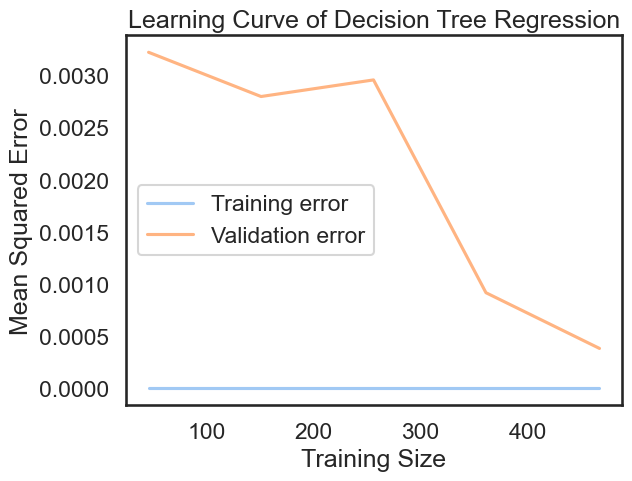

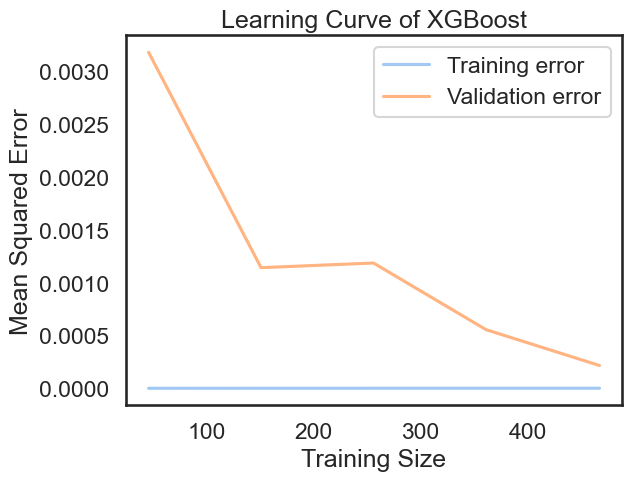

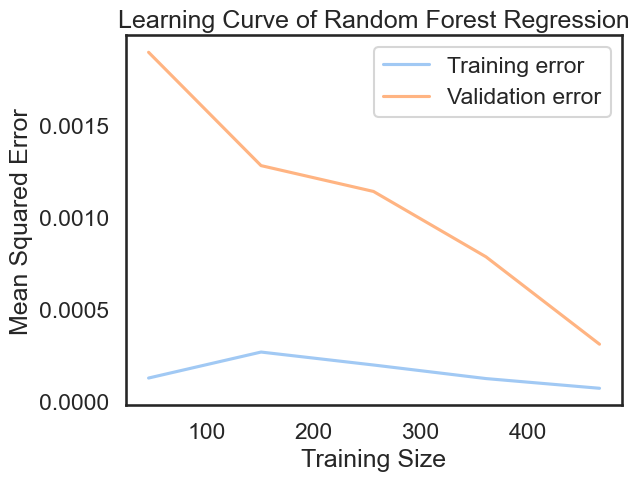

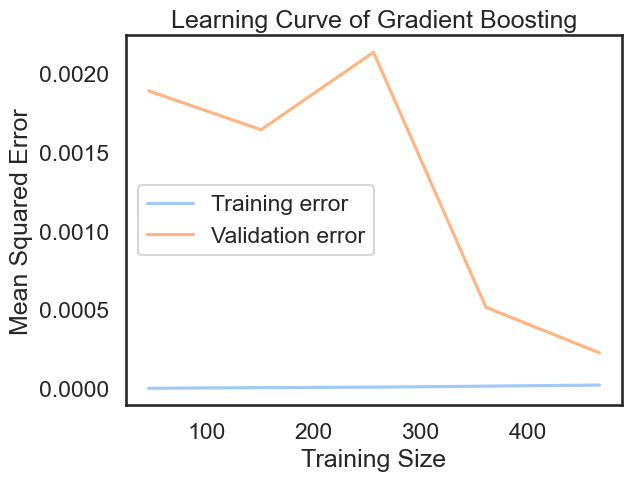

In [118]:
models = [('Decision Tree Regression', DecisionTreeRegressor()),
          ('XGBoost'                 , xgb.XGBRegressor()),
          ('Random Forest Regression', RandomForestRegressor()),
          ('Gradient Boosting'       , GradientBoostingRegressor())
         ]

i=0

model_feature = ['dt_feature', 'xgb_feature', 'rf_feature', 'gbr_feature']

for model in models:
    models_dict = {model[0]: model[1]}
    
    # Drop unwanted features
    model_feature_df = preprocessed_df.drop(columns=zeroCoef_arr[i])
    # Train and test split
    model_feature_X_train, model_feature_X_test, model_feature_y_train, model_feature_y_test = trainTestSplit(model_feature_df)

    model_feature[i] = model_feature_X_train, model_feature_X_test, model_feature_y_train, model_feature_y_test
    
    i+=1
    # Analyze the type of error of each model made
    train_df, test_df, pred_train, pred_test = modelPrediction(models_dict, 
                                                               model_feature_X_train,
                                                               model_feature_y_train, 
                                                               model_feature_X_test, 
                                                               model_feature_y_test)
    # Concatenate the two dataframes vertically
    df_combined = pd.concat([train_df, test_df], ignore_index=False)
    styles = [dict(selector="caption",
                   props=[("text-align", "center"),
                          ("font-size", "120%"),
                          ("color", 'Blue')])]
    df_combined = df_combined.style.set_caption("Evaluation on {}".format(model[0])).set_table_styles(styles)
    # Display the combined dataframe
    display(df_combined)
    
    r2_arr.append(test_df.iloc[2,4])
    
################################################# 10-fold Cross-validation ##########################################################################################################    
    i=0
    cv_df = pd.DataFrame(columns=['k_fold','MSE'])
    for k in (3,5,10):
        cv = RepeatedKFold(n_splits=k, n_repeats=3, random_state=1)
        cv_scores = cross_val_score(model[1], X_train, y_train, cv=cv, scoring='neg_mean_squared_error')

        # Get the mean and standard deviation of the scores
        mean_score = -cv_scores.mean()
        std_score  = cv_scores.std()

        cv_df.loc['Decision Tree Regression Validation Data_'+str(k)]    = [k, 
                                                                          test_df.iloc[i,2].item()
                                                                         ]
        cv_df.loc['Decision Tree Regression Cross-Validation_'+str(k)] = [k, 
                                                                          mean_score
                                                                         ]
        i+=1
        
    
    cv_df['k_fold'] = cv_df['k_fold'].astype(int)
    styles = [dict(selector="caption",
               props=[("text-align", "center"),
                      ("font-size", "120%"),
                      ("color", 'Blue')])]
    cv_df = cv_df.style.set_caption("Cross-Validation evaluation on {}".format(model[0])).set_table_styles(styles)
    display(cv_df)
    
################################################# Plotting learning curve ##########################################################################################################    

    train_sizes, train_scores, test_scores = learning_curve(model[1], model_feature_X_train, model_feature_y_train, 
                                                            cv=10, scoring='neg_mean_squared_error')
    train_mean = -np.mean(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Training error')
    plt.plot(train_sizes, test_mean, label='Validation error')
    plt.legend()
    plt.title('Learning Curve of {}'.format(model[0]))
    plt.xlabel('Training Size')
    plt.ylabel('Mean Squared Error')
    plt.show()
    
    print("\n====================================================================================================================\n")

#### *Short-list the top three to five most promising models*

In [139]:
temp_data=['Lasso Regression', 
           'Decision Tree Regression',
           'XGBoost',
           'Random Forest Regression',
           'Gradient Boosting']

top3_model = pd.DataFrame({'Model': temp_data, 'R-Squared': r2_arr})
top3_model = top3_model.sort_values('R-Squared', ascending=False)
top3_model.head(3)

Model  R-Squared
3  Random Forest Regression  98.704830
4         Gradient Boosting  98.607547
2                   XGBoost  98.566336

### *Fine-Tune Hyperparameter* 

#### Decision Tree regression 

#### Lasso regression 

use default alpha value = 1.0 for first iterative

In [ ]:
# Compare the dataset after performing feature seelction and without feature selection
dataset = [[X_train, y_train, X_test, y_test], 
           [wo_X_train, wo_y_train, wo_X_test, wo_y_test]]

col_name = [['Training Set W Feature Selection', 'Testing Set W Feature Selection'],
            ['Training Set W/O Feature Selection', 'Testing Set W/O Feature Selection']]

In [ ]:
def lassoRegression():

    lasso = Lasso(alpha=1)
    
    i=0
    eval_df = pd.DataFrame(columns=['R-Squared', 'RMSE', 'MSE', 'MAE'])

    for i, data in enumerate(dataset): 
        lasso.fit(data[0], data[1])
        
        # Training data
        train_score_ls =lasso.score(data[0], data[1])
        
        # Prediction
        pred_train = lasso.predict(data[0])
        mse_train = mean_squared_error(data[1], pred_train)
        mae_train = mean_absolute_error(data[1], pred_train)
        rmse_train = np.sqrt(mean_squared_error(data[1], pred_train))

        # Test data
        test_score_ls =lasso.score(data[2],data[3])
        
        # Prediction
        pred_test = lasso.predict(data[2])
        mse_test = mean_squared_error(data[3], pred_test)
        mae_test = mean_absolute_error(data[3], pred_test)
        rmse_test = np.sqrt(mean_squared_error(data[3], pred_test))

        eval_df.loc[col_name[i][0]] = [round(train_score_ls *100,2), 
                                       round(mse_train, 2), 
                                       round(rmse_train, 2), 
                                       round(mae_train, 2)]
        
        eval_df.loc[col_name[i][1]] = [round(test_score_ls * 100, 2), 
                                      round(mse_test, 2), 
                                      round(rmse_test, 2), 
                                      round(mae_test, 2)]
        i+=1
    return eval_df


lasso_df = lassoRegression()
lasso_df

#### *Fine-Tune Hyperparameter for Lasso Regression* 

In [ ]:
lasso = Lasso()
alphas = np.logspace(-4, 0, 100)

In [ ]:
def fitBest(eval_df, best_alpha, k, X_train, y_train, X_test, y_test):
    # Fit the best parameter into Lasso Regression
    lasso.set_params(alpha=best_alpha)
    lasso.fit(X_train, y_train)

    # Evaluate the model
    # Training data
    train_score_ls =lasso.score(X_train, y_train)
    # Prediction
    pred_train = lasso.predict(X_train)
    # Evaluate metrics
    mse_train  = mean_squared_error(y_train, pred_train)
    mae_train  = mean_absolute_error(y_train, pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
    mape_train = np.mean(np.abs((y_train - pred_train)/y_train))*100
    mad_train  = mean_absolute_error(y_train, pred_train)
    evc_train  = explained_variance_score(y_train, pred_train, force_finite=False)

    # Test data
    test_score_ls =lasso.score(X_test, y_test)
    # Prediction
    pred_test = lasso.predict(X_test)
    mse_test  = mean_squared_error(y_test, pred_test)
    mae_test  = mean_absolute_error(y_test, pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
    mape_test = np.mean(np.abs((y_test - pred_test)/y_test))*100
    mad_test  = mean_absolute_error(y_test, pred_test)
    evc_test  = explained_variance_score(y_test, pred_test, force_finite=False)

    eval_df.loc['Training Set_'+str(k)] = [k,
                                   best_alpha,
                                   train_score_ls *100,
                                   evc_train,
                                   rmse_train,
                                   mse_train,  
                                   mae_train,
                                   mape_train,
                                   mad_train]

    eval_df.loc['Testing Set_'+str(k)] = [k,
                                   best_alpha,
                                   test_score_ls * 100,
                                   evc_test,
                                   rmse_test,
                                   mse_test,  
                                   mae_test,
                                   mape_test,
                                   mad_test]
    return eval_df

*using GridSearchCV* 

In [ ]:
import time

def lassoGridSearchCV(alphas, X_train, y_train, X_test, y_test):  

    # Define Dataset
    eval_df = pd.DataFrame(columns=['K_Folds', 'alpha', 'R2', 'EVC', 'RMSE', 'MSE', 'MAE', 'MAPE', 'MAD'])

    params = {'alpha': alphas}
    lasso = Lasso()
    
    for k in [3,5,10]:
        # define model evaluation method
        cv = RepeatedKFold(n_splits=k, n_repeats=3, random_state=1)
        gscv = GridSearchCV(lasso, params,
                            cv = cv,
                            scoring='neg_mean_squared_error'
                           )

        gscv.fit(X_train, y_train)
        alpha_value = gscv.best_estimator_.alpha
        
        fitBest(eval_df, alpha_value, k, X_train, y_train, X_test, y_test)
        
    return eval_df, gscv

# Get training time
start_time = time.time()

# Data after performing feature selection
gscv_df, gscv = lassoGridSearchCV(alphas, X_train, y_train, X_test, y_test)
styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "120%"),
                              ("color", 'Blue')])]
gscv_df = gscv_df.style.set_caption("Model fits with the data after performing feature selection")\
           .set_table_styles(styles)
display(gscv_df)

# Data without perform feature selection
gscv_df, gscv = lassoGridSearchCV(alphas, wo_X_train, wo_y_train, wo_X_test, wo_y_test)
styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "120%"),
                              ("color", 'Blue')])]
gscv_df = gscv_df.style.set_caption("Model fits with the data without performing feature selection")\
           .set_table_styles(styles)
display(gscv_df)

end_time = time.time()
gscv_time = end_time - start_time
print(f"Training time: {end_time - start_time:.3f} seconds")

*using LassoCV* 

In [ ]:
def lassoFineTune(alphas, X_train, y_train, X_test, y_test):
    # Define Dataset
    eval_df = pd.DataFrame(columns=['K_Folds', 'alpha', 'R2', 'EVC', 'RMSE', 'MSE', 'MAE', 'MAPE', 'MAD'])
    
    for k in [3,5,10]:
        # define model evaluation method
        cv = RepeatedKFold(n_splits=k, n_repeats=3, random_state=1)

        # Lasso with k-fold cross-validation
        ls_tune_model = LassoCV(alphas=alphas, cv=cv)

        # Fit model to find the best parameter
        ls_tune_model.fit(X_train, y_train)

        eval_df=fitBest(eval_df, ls_tune_model.alpha_, k, X_train, y_train, X_test, y_test)
            
    return eval_df, ls_tune_model

# Get training time
start_time = time.time()

# Data after performing feature selection
lasso_df, ls_tune_model = lassoFineTune(alphas, X_train, y_train, X_test, y_test)
styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "120%"),
                              ("color", 'Blue')])]
lasso_df = lasso_df.style.set_caption("Model fits with the data after performing feature selection")\
           .set_table_styles(styles)
display(lasso_df)

# Data without perform feature selection
lasso_df, ls_tune_model = lassoFineTune(alphas, wo_X_train, wo_y_train, wo_X_test, wo_y_test)
styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "120%"),
                              ("color", 'Blue')])]
lasso_df = lasso_df.style.set_caption("Model fits with the data without performing feature selection")\
           .set_table_styles(styles)
display(lasso_df)

end_time = time.time()
lasso_time = end_time - start_time
print(f"Training time: {end_time - start_time:.3f} seconds")

#### *Compare the performance of GridSearchCV & LassoCV* 

In [ ]:
# Plot MSE for LassoCV and GridSearchCV
plt.figure(figsize=(10, 6))
plt.plot(ls_tune_model.alphas_, ls_tune_model.mse_path_.mean(axis=1), label='LassoCV')
plt.plot(gscv.cv_results_['param_alpha'].data, gscv.cv_results_['mean_test_score'], label='GridSearchCV')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Comparison of LassoCV and GridSearchCV')
plt.legend()
plt.show()

plt.bar(['LassoCV', 'GridSearchCV'], [lasso_time, gscv_time])
plt.ylabel('Training Time (Seconds)')
plt.title('Comparison of Training Time of LassoCV and GridSearchCV')
plt.show()

#### *Feature Selection Using Lasso Regression* 

In [ ]:
coef_features = list(zip(X_train, ls_tune_model.coef_))
# Calling DataFrame constructor on list 
coef_features_df = pd.DataFrame(coef_features, columns=['features', 'coefficient']) 
display(coef_features_df[coef_features_df['coefficient']>=0]) 

# Drop unwanted features
ls_df = preprocessed_df.drop(columns=['hourly',
                                      'employer_provided',
                                      'same_state',
                                      'excel',
                                      'num_comp',
                                      'job_description',
                                      'headquarters',
                                      'industry',
                                      'sector',
                                      'revenue',
                                      'competitors',
                                      'job_state',
                                      'job_simp',
                                      'seniority',
                                      ])
# Train and test split
ls_X_train, ls_X_test, ls_y_train, ls_y_test = trainTestSplit(ls_df)
print(ls_X_train.shape, ls_X_test.shape, ls_y_train.shape, ls_y_test.shape)

#### *Evaluate on LassoRegression* 

In [ ]:
# def fitBest(eval_df, best_alpha, k, X_train, y_train, X_test, y_test):
eval_df = pd.DataFrame(columns=['R-Squared', 'EVC','RMSE', 'MSE', 'MAE', 'MAPE', 'MAD'])
# Fit the best parameter into Lasso Regression
lasso = Lasso(alpha=0.000335)    
lasso.fit(ls_X_train, ls_y_train)

# Evaluate the model
# Training data
train_score_ls =lasso.score(ls_X_train, ls_y_train)
# Prediction
pred_train = lasso.predict(ls_X_train)
# Evaluate metrics
mse_train  = mean_squared_error(ls_y_train, pred_train)
mae_train  = mean_absolute_error(ls_y_train, pred_train)
rmse_train = np.sqrt(mean_squared_error(ls_y_train, pred_train))
mape_train = np.mean(np.abs((ls_y_train - pred_train)/ls_y_train))*100
mad_train  = mean_absolute_error(ls_y_train, pred_train)
evc_train  = explained_variance_score(ls_y_train, pred_train, force_finite=False)

# Test data
test_score_ls =lasso.score(ls_X_test, ls_y_test)
# Prediction
pred_test = lasso.predict(ls_X_test)
mse_test  = mean_squared_error(ls_y_test, pred_test)
mae_test  = mean_absolute_error(ls_y_test, pred_test)
rmse_test = np.sqrt(mean_squared_error(ls_y_test, pred_test))
mape_test = np.mean(np.abs((ls_y_test - pred_test)/ls_y_test))*100
mad_test  = mean_absolute_error(ls_y_test, pred_test)
evc_test  = explained_variance_score(ls_y_test, pred_test, force_finite=False)

eval_df.loc['Training Set'] = [train_score_ls *100,
                               evc_train,
                               rmse_train,
                               mse_train,  
                               mae_train,
                               mape_train,
                               mad_train]

eval_df.loc['Testing Set'] = [test_score_ls * 100,
                              evc_test,
                              rmse_test,
                              mse_test,  
                              mae_test,
                              mape_test,
                              mad_test]

styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "120%"),
                              ("color", 'Blue')])]
eval_df = eval_df.style.set_caption("Evaluation on Lasso Regression Model")\
           .set_table_styles(styles)
display(eval_df)

#### Random Forest 

#### Gradient Boosting 